# **Loading dataset and import libraries**


## Dataset Attributes


* **customerID** : Customer ID
* **gender** : Whether the customer is a male or a female
* **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
* **Partner** : Whether the customer has a partner or not (Yes, No)
* **Dependents** : Whether the customer has dependents or not (Yes, No)
* **tenure** : Number of months the customer has stayed with the company
* **PhoneService** : Whether the customer has a phone service or not (Yes, No)
* **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
* **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
* **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
* **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
* **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
* **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
* **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
* **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
* **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
* **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
* **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges** : The amount charged to the customer monthly
* **TotalCharges** : The total amount charged to the customer
* **Churn** : Whether the customer churned or not (Yes or No)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Graphics in retina format (sharp graphics)
%config InlineBackend.figure_format = 'retina'

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.ensemble import StackingClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn 2.csv')

# **Explore the dataset and manipulating data**

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [13]:
df.duplicated().sum()

0

In [14]:
# drop customerID because it is useless for our analysis
df = df.drop(columns = ['customerID'])

In [15]:
df.shape # Dataset size 7043 observations

(7043, 20)

In [16]:
df.columns # All features in the dataset

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [18]:
df["SeniorCitizen"].unique()

array([0, 1])

In [19]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

In [20]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(str)
df['SeniorCitizen']= df['SeniorCitizen'].map({'0': 'No', '1': 'Yes'})
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [22]:
df.describe().T

count         mean          std    min     25%       50%  \
tenure          7043.0    32.371149    24.559481   0.00    9.00    29.000   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.50    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.45  1397.475   

                      75%      max  
tenure            55.0000    72.00  
MonthlyCharges    89.8500   118.75  
TotalCharges    3794.7375  8684.80

In [23]:
df.describe(include='object').T

count unique               top  freq
gender            7043      2              Male  3555
SeniorCitizen     7043      2                No  5901
Partner           7043      2                No  3641
Dependents        7043      2                No  4933
PhoneService      7043      2               Yes  6361
MultipleLines     7043      3                No  3390
InternetService   7043      3       Fiber optic  3096
OnlineSecurity    7043      3                No  3498
OnlineBackup      7043      3                No  3088
DeviceProtection  7043      3                No  3095
TechSupport       7043      3                No  3473
StreamingTV       7043      3                No  2810
StreamingMovies   7043      3                No  2785
Contract          7043      3    Month-to-month  3875
PaperlessBilling  7043      2               Yes  4171
PaymentMethod     7043      4  Electronic check  2365
Churn             7043      2                No  5174

In [24]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [25]:
df[np.isnan(df['TotalCharges'])] # rows that have null values

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female            No     Yes        Yes       0           No   
753     Male            No      No        Yes       0          Yes   
936   Female            No     Yes        Yes       0          Yes   
1082    Male            No     Yes        Yes       0          Yes   
1340  Female            No     Yes        Yes       0           No   
3331    Male            No     Yes        Yes       0          Yes   
3826    Male            No     Yes        Yes       0          Yes   
4380  Female            No     Yes        Yes       0          Yes   
5218    Male            No     Yes        Yes       0          Yes   
6670  Female            No     Yes        Yes       0          Yes   
6754    Male            No      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           NaN    No  


In [26]:
print(f"Mode :{df.TotalCharges.mode()}")
print(f"Mean :{df.TotalCharges.mean()}")
print(f"Median :{df.TotalCharges.median()}")

Mode :0    20.2
Name: TotalCharges, dtype: float64
Mean :2283.3004408418656
Median :1397.475


In [27]:
print(df['TotalCharges'].skew()) # Positive skew, so it would be better to use the median to fill the missing values

0.961642499724251


In [28]:
df['TotalCharges'] = df['TotalCharges'].fillna(df.TotalCharges.median()) # Fill with median values in the missing data points

In [29]:
df.isna().sum() # Check missing values again

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
df.nunique() # Check how many unique values each feature has

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [31]:
# apply loop check unique value without int or float in dataset
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [32]:
# Print summary of the dataset
def table_summary(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values

    return summary

In [33]:
table_summary(df)

Dataset Shape: (7043, 20)


Name   dtypes  Missing  Uniques
0             gender   object        0        2
1      SeniorCitizen   object        0        2
2            Partner   object        0        2
3         Dependents   object        0        2
4             tenure    int64        0       73
5       PhoneService   object        0        2
6      MultipleLines   object        0        3
7    InternetService   object        0        3
8     OnlineSecurity   object        0        3
9       OnlineBackup   object        0        3
10  DeviceProtection   object        0        3
11       TechSupport   object        0        3
12       StreamingTV   object        0        3
13   StreamingMovies   object        0        3
14          Contract   object        0        3
15  PaperlessBilling   object        0        2
16     PaymentMethod   object        0        4
17    MonthlyCharges  float64        0     1585
18      TotalCharges  float64        0     6531
19             Churn   object        0        2

# **Exploratory Data Analysis(EDA)**

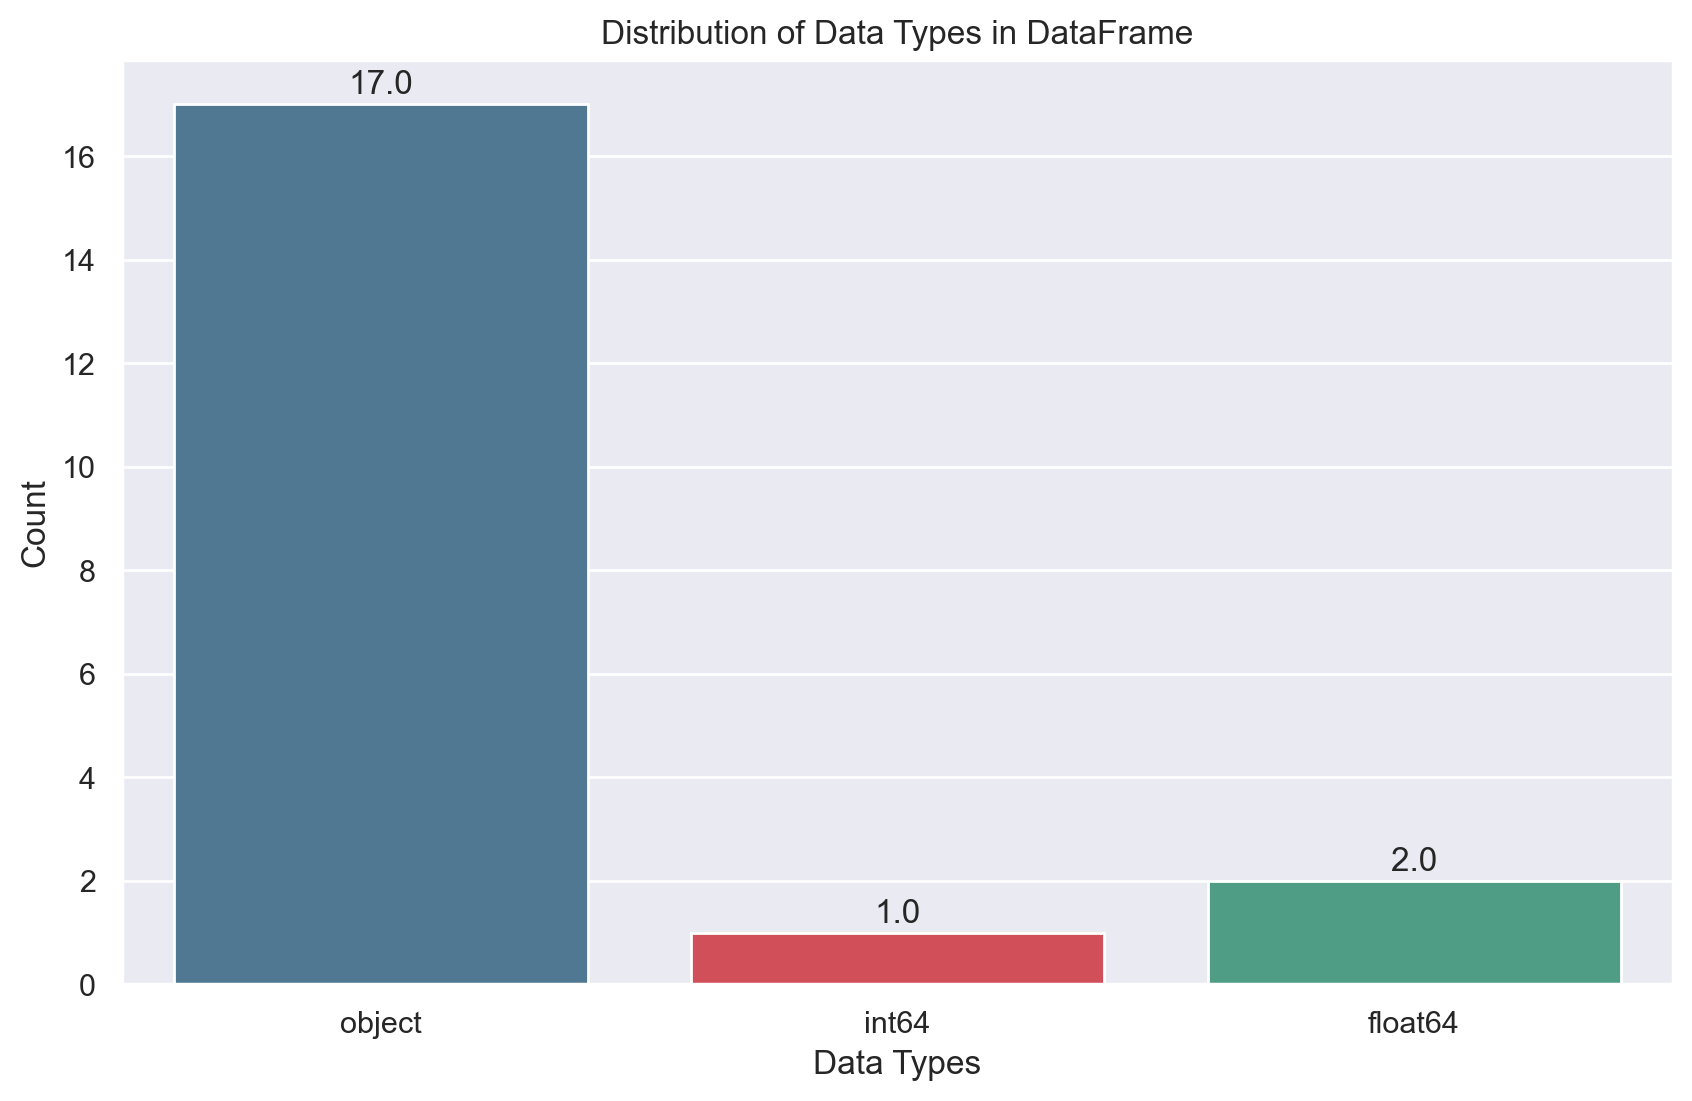

In [34]:
plt.figure(figsize = (10,6))
sns.set_theme(style="darkgrid", palette="pastel")
fig = sns.countplot(x=df.dtypes,palette=["#457B9D", "#E63946","#43AA8B"])
plt.xlabel("Data Types")
plt.ylabel("Count")
plt.title("Distribution of Data Types in DataFrame")


for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=12)

plt.show()

* Most of the data are categorical data

Churn
No     5174
Yes    1869
Name: count, dtype: int64


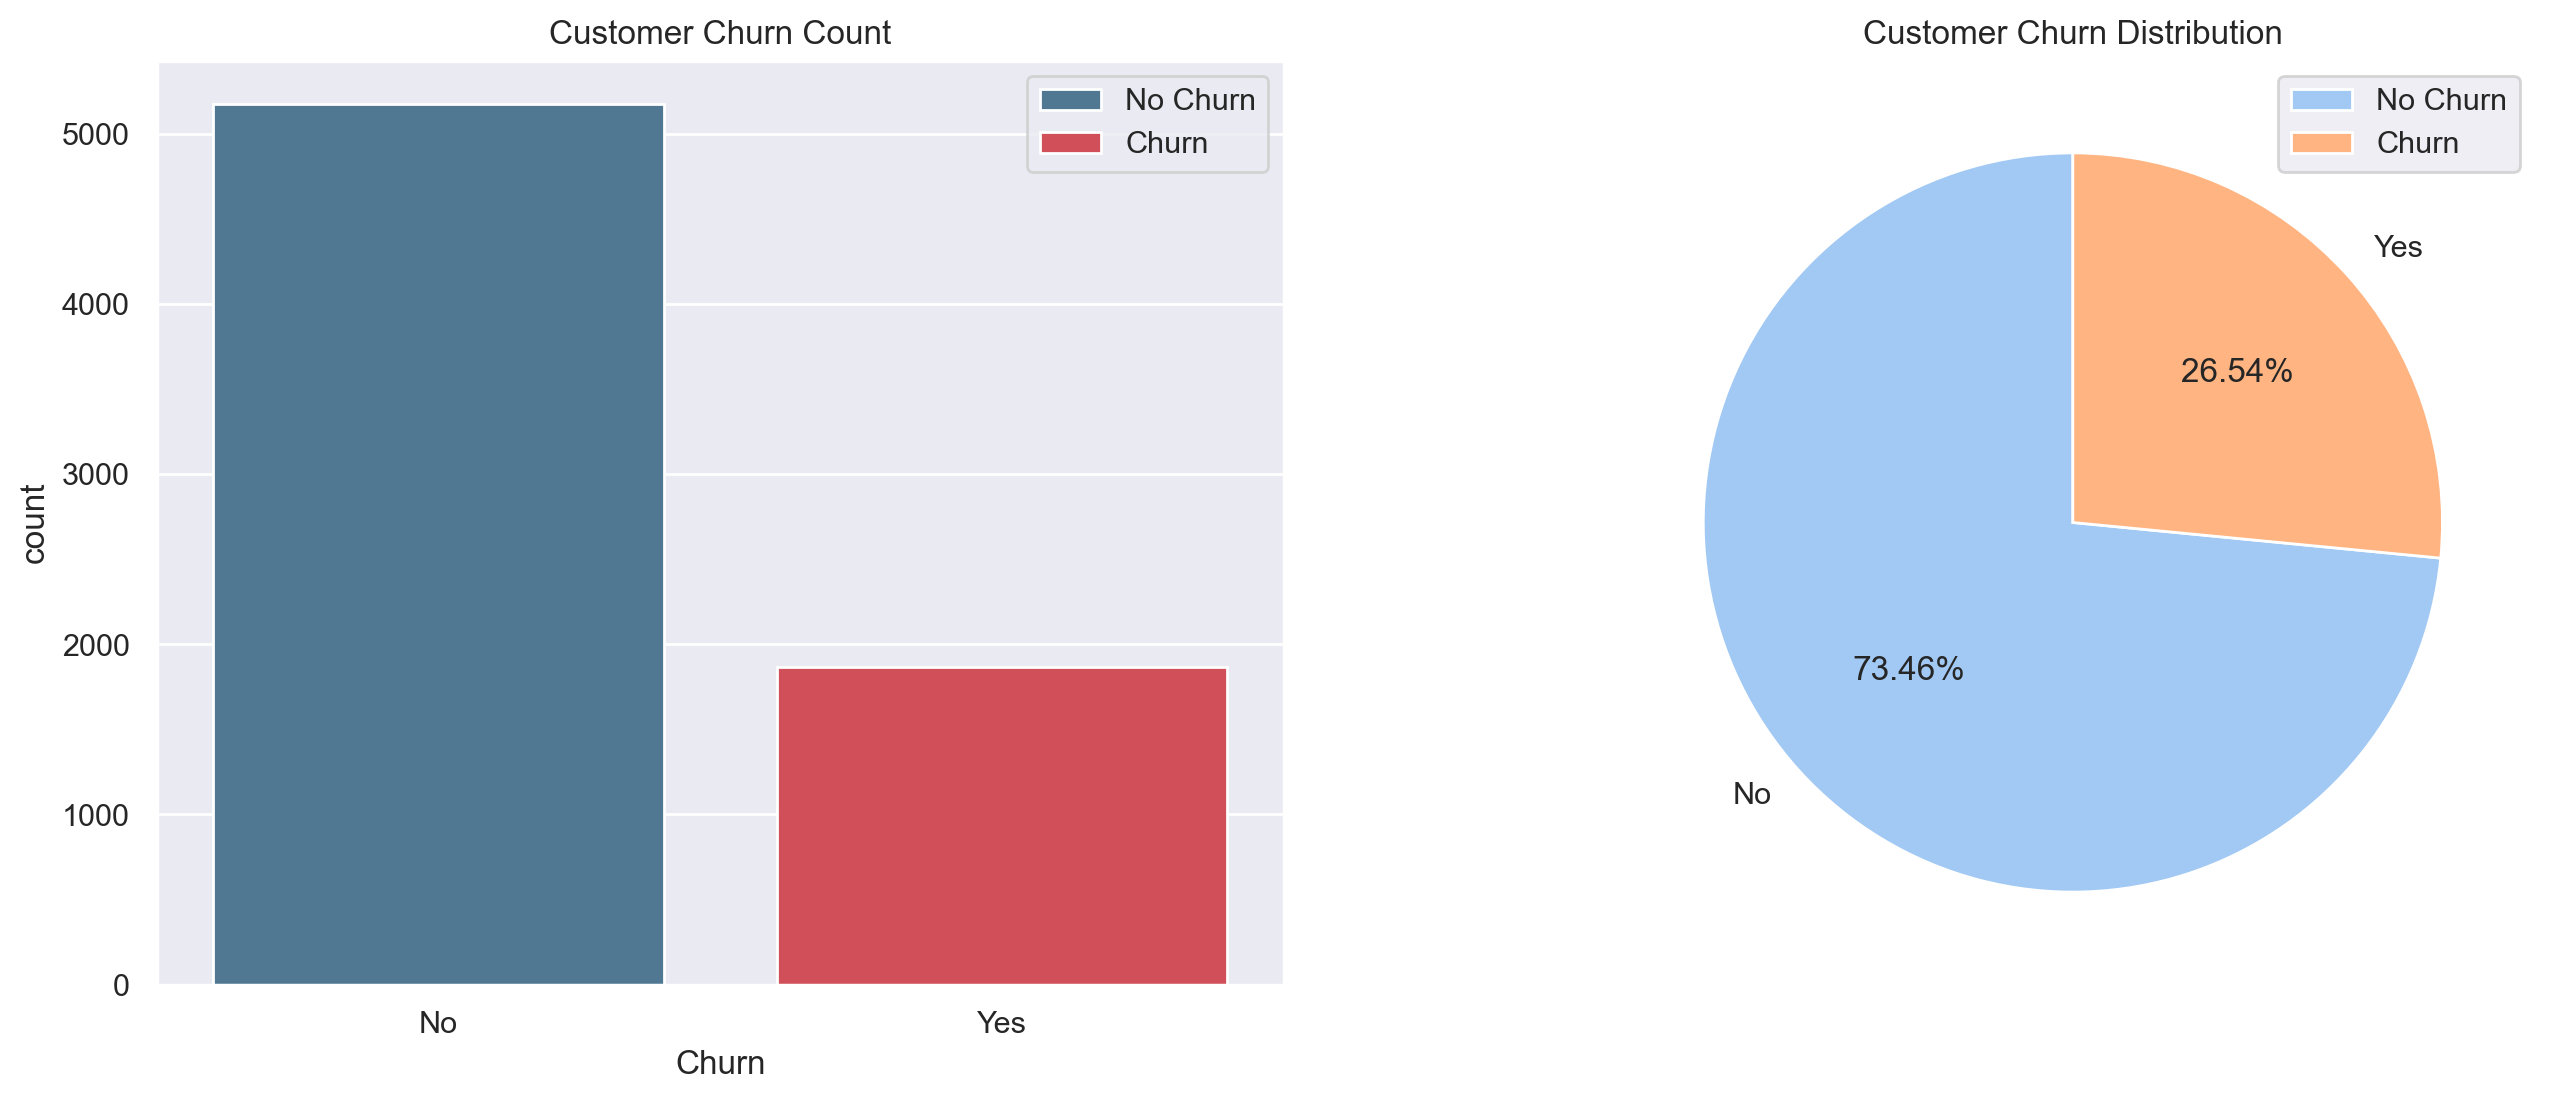

In [35]:
print(df['Churn'].value_counts())
sns.set_theme(style="darkgrid", palette="pastel")
fig = plt.subplots(nrows =1, ncols=2, figsize=(16, 6) )  # 1 row, 2 columns

# Countplot
plt.subplot(1,2,1)
g =sns.countplot(data=df, x="Churn",palette=["#457B9D", "#E63946"])
plt.legend(['No Churn', 'Churn'])
g.set_title('Customer Churn Count')


# Pie chart
plt.subplot(1,2,2)
churn_counts = df['Churn'].value_counts()
g = plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.2f%%', startangle=90)
plt.title('Customer Churn Distribution')
plt.legend(['No Churn', 'Churn'])
plt.show()

* We can see that this dataset is imbalanced. Datasets with an underrepresented class tend to overfit.

## **1. Plotting all categorical features**



### **1.1 Customer Information related categorical features**

In [36]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'domain'}, {'type': 'xy'}]],  # Pie chart in 1st, Histogram in 2nd
    subplot_titles=["Gender Distribution", "Churn Distribution by Gender"]
)

# Adding Pie Chart
fig.add_trace(
    go.Pie(labels=['Male', 'Female'], values=df['gender'].value_counts(), name="Gender",marker=dict(colors=['#457B9D', '#E6396D'])),row=1, col=1)

# Histogram
histogram = px.histogram(df, x="gender", color="Churn", barmode="group",color_discrete_map={"Yes": "#F94144", "No": "#43AA8B"})

# Adding Histogram to Subplots
for trace in histogram.data:
    fig.add_trace(trace, row=1, col=2)


# Updating X and Y axis labels for histogram
fig.update_xaxes(title_text="Gender", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)

# Updating Layout
fig.update_layout(title_text="<b>Gender Analysis and Churn</b>", width=1000, height=500)

# Show the figure
fig.show()

* We can see that gender is equally distributed across the dataset.

In [37]:
print(round(df['SeniorCitizen'].value_counts()))
fig = px.histogram(df, x="SeniorCitizen", color="Churn",barmode="group", title="<b>Chrun distribution Senior Citizen</b>", color_discrete_map={"Yes": "#E63946", "No": "#457B9D"} )
fig.update_layout(width=800, height=600)
fig.show()

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64


* Number of Senior Citizen clients are quite low in dataset.
* We can see that there is an almost 40% churn of SeniorCitizen consumers out of that.
* It represents 476 of the 1142 Senior Citizen clients in total.

In [38]:
print(round(df['Partner'].value_counts()))
fig = px.histogram(df, x="Partner", color="Churn",barmode="group", title="<b>Chrun distribution Partner</b>",color_discrete_map={"Yes": "#E63946", "No": "#457B9D"})
fig.update_layout(width=800, height=600)
fig.show()

Partner
No     3641
Yes    3402
Name: count, dtype: int64


* Customers without a partner are more tend to churn.

In [39]:
print(df['Dependents'].value_counts())
fig = px.histogram(df, x="Dependents", color="Churn",barmode="group", title="<b>Chrun distribution Dependents</b>",color_discrete_map={"Yes": "#E63946", "No": "#457B9D"})
fig.update_layout(width=800, height=600)
fig.show()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


* Customers without a dependent are more tend to churn.

### **1.2 Services related categorical features**

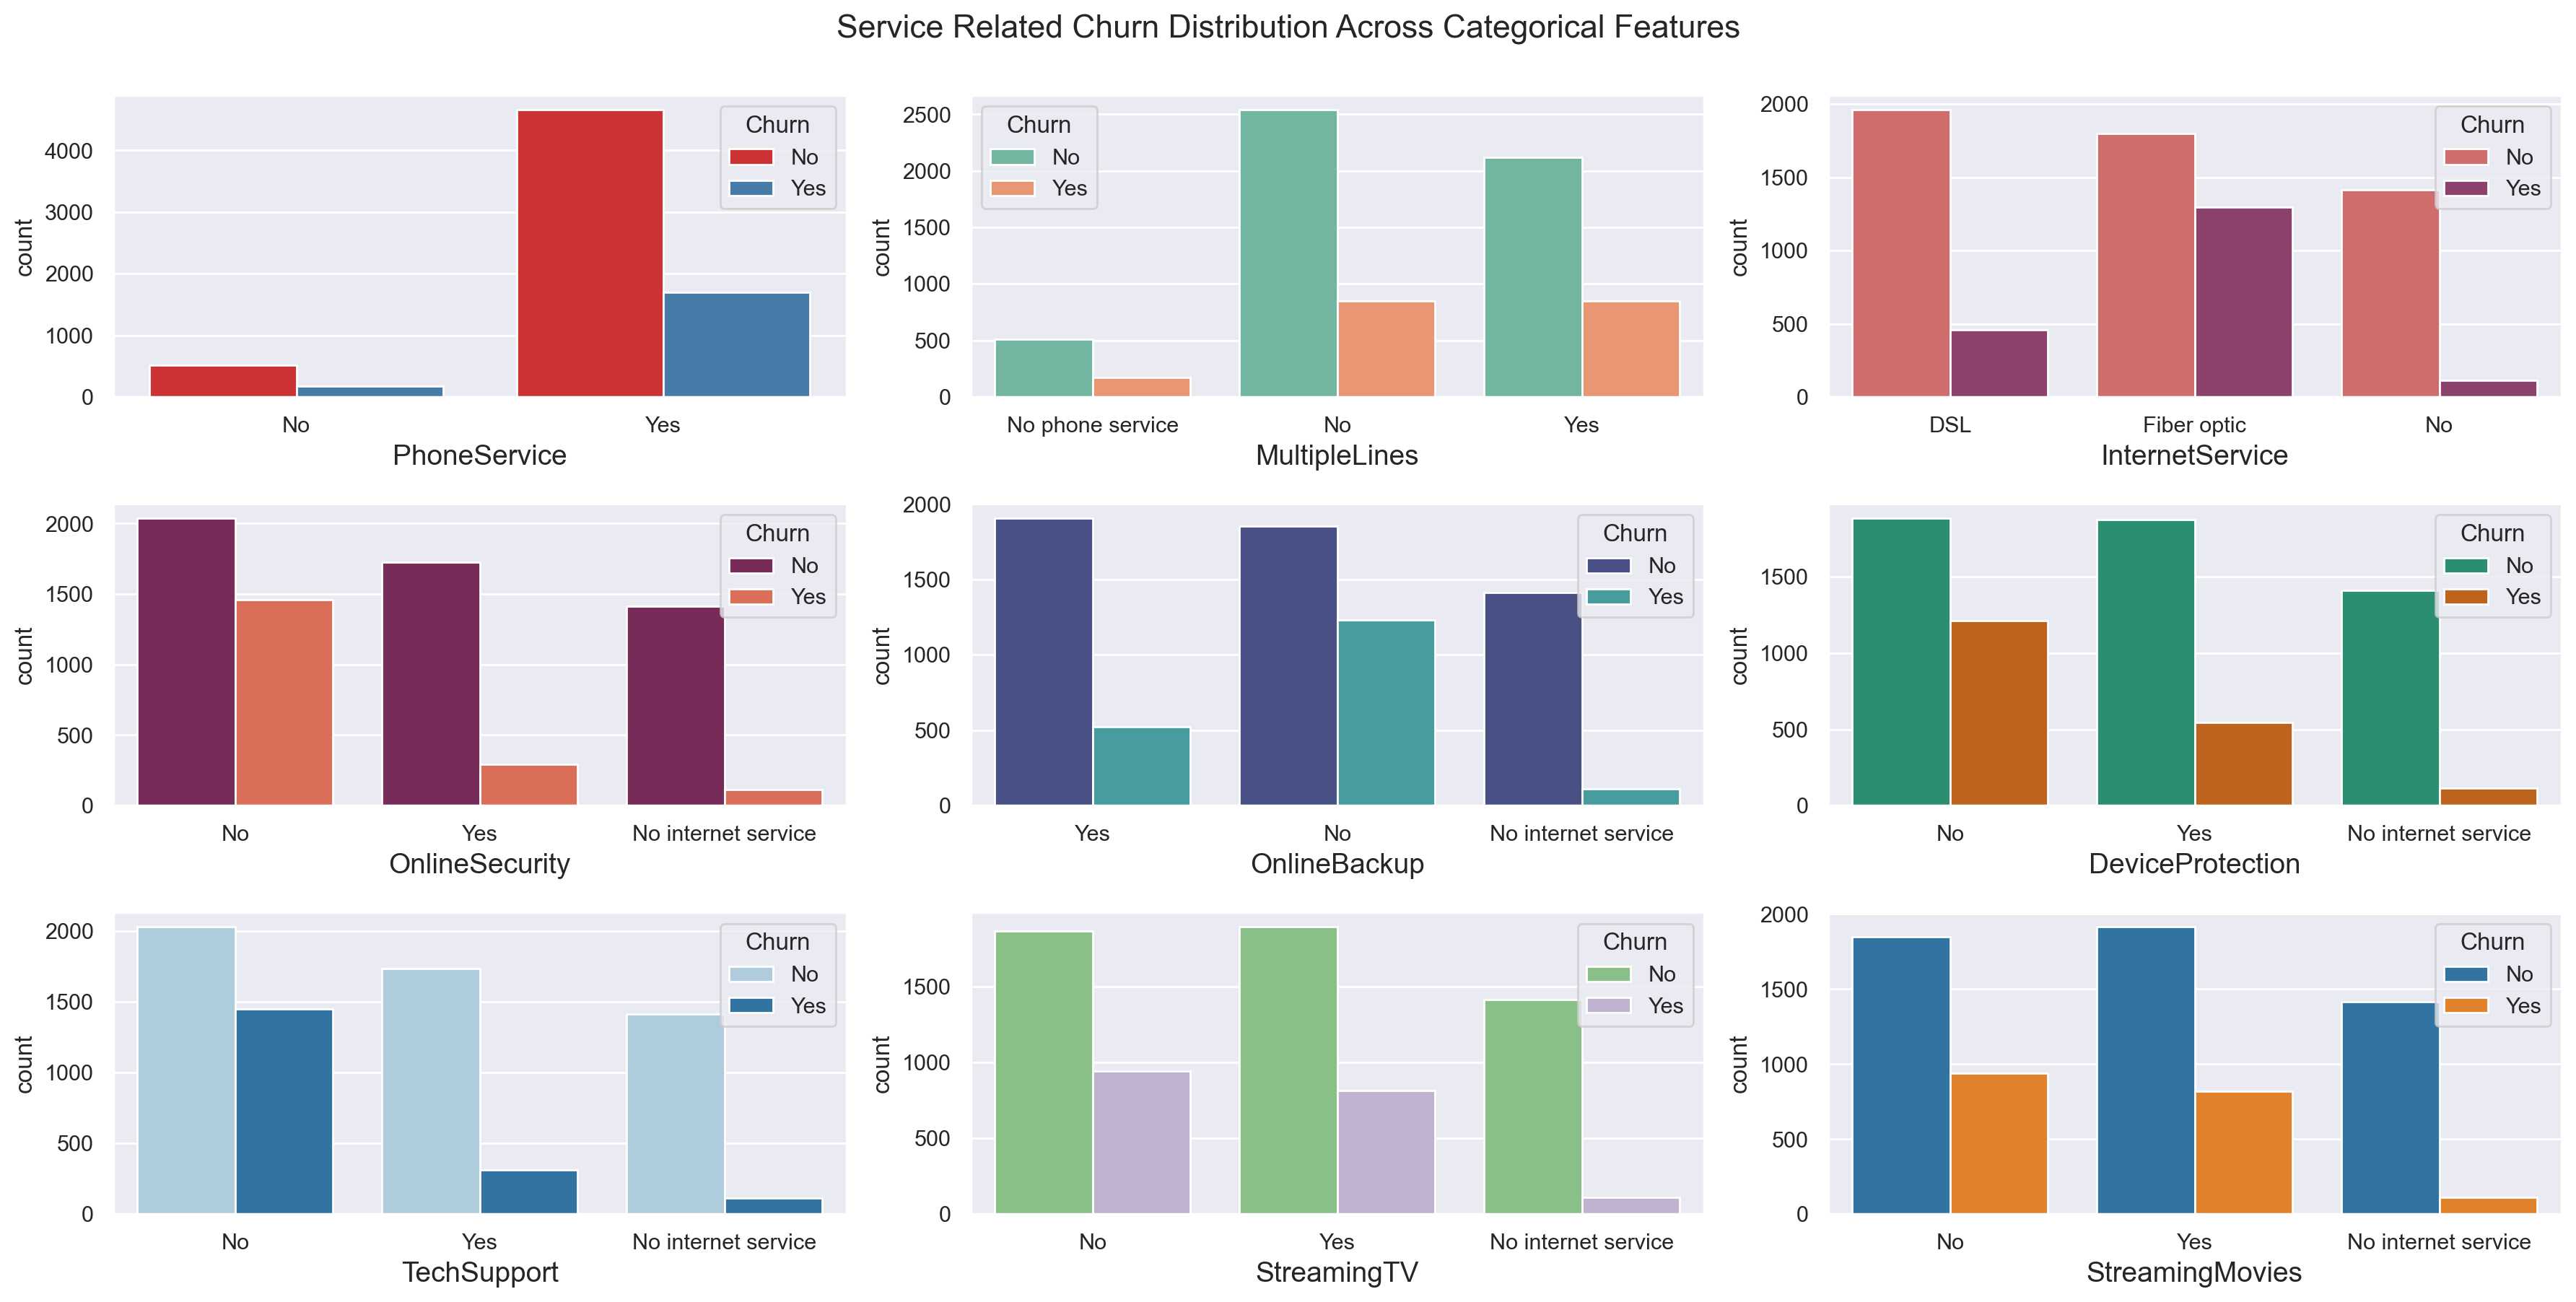

In [40]:
# List of categorical features to plot
service_related_feat = [ "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies" ]

# List of color palettes for variety
palettes = ['Set1', 'Set2', 'flare', 'rocket', 'mako', 'Dark2', 'Paired', 'Accent', 'tab10']

# Create 3x3 subplots
fig, ax = plt.subplots(3, 3, figsize=(18,9))

# Loop through features and plot them
for i, feature in enumerate(service_related_feat):
    row, col = divmod(i, 3)  # Compute row & column index
    sns.countplot(x=feature, data=df, hue='Churn',
                  ax=ax[row, col], palette=palettes[i])
    ax[row, col].set_xlabel(feature, fontsize=14)

# Set main title for the entire figure
fig.suptitle('Service Related Churn Distribution Across Categorical Features', fontsize=16, y=1)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



*   Higher number of fiber optic users are tend to churn, while most of users are preferred to use DSL. Users that are without an internet servive are more likely to stay.
*   Most of the users without OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport are more likely to churn when comparing with the users that use these services.
*   StreamingTV and StreamingMovies figures are almost identical. Many customers have been churned whether they have a subscription to StreamingTV or StreamingMovies.



### **1.3 Billing related categorical features**

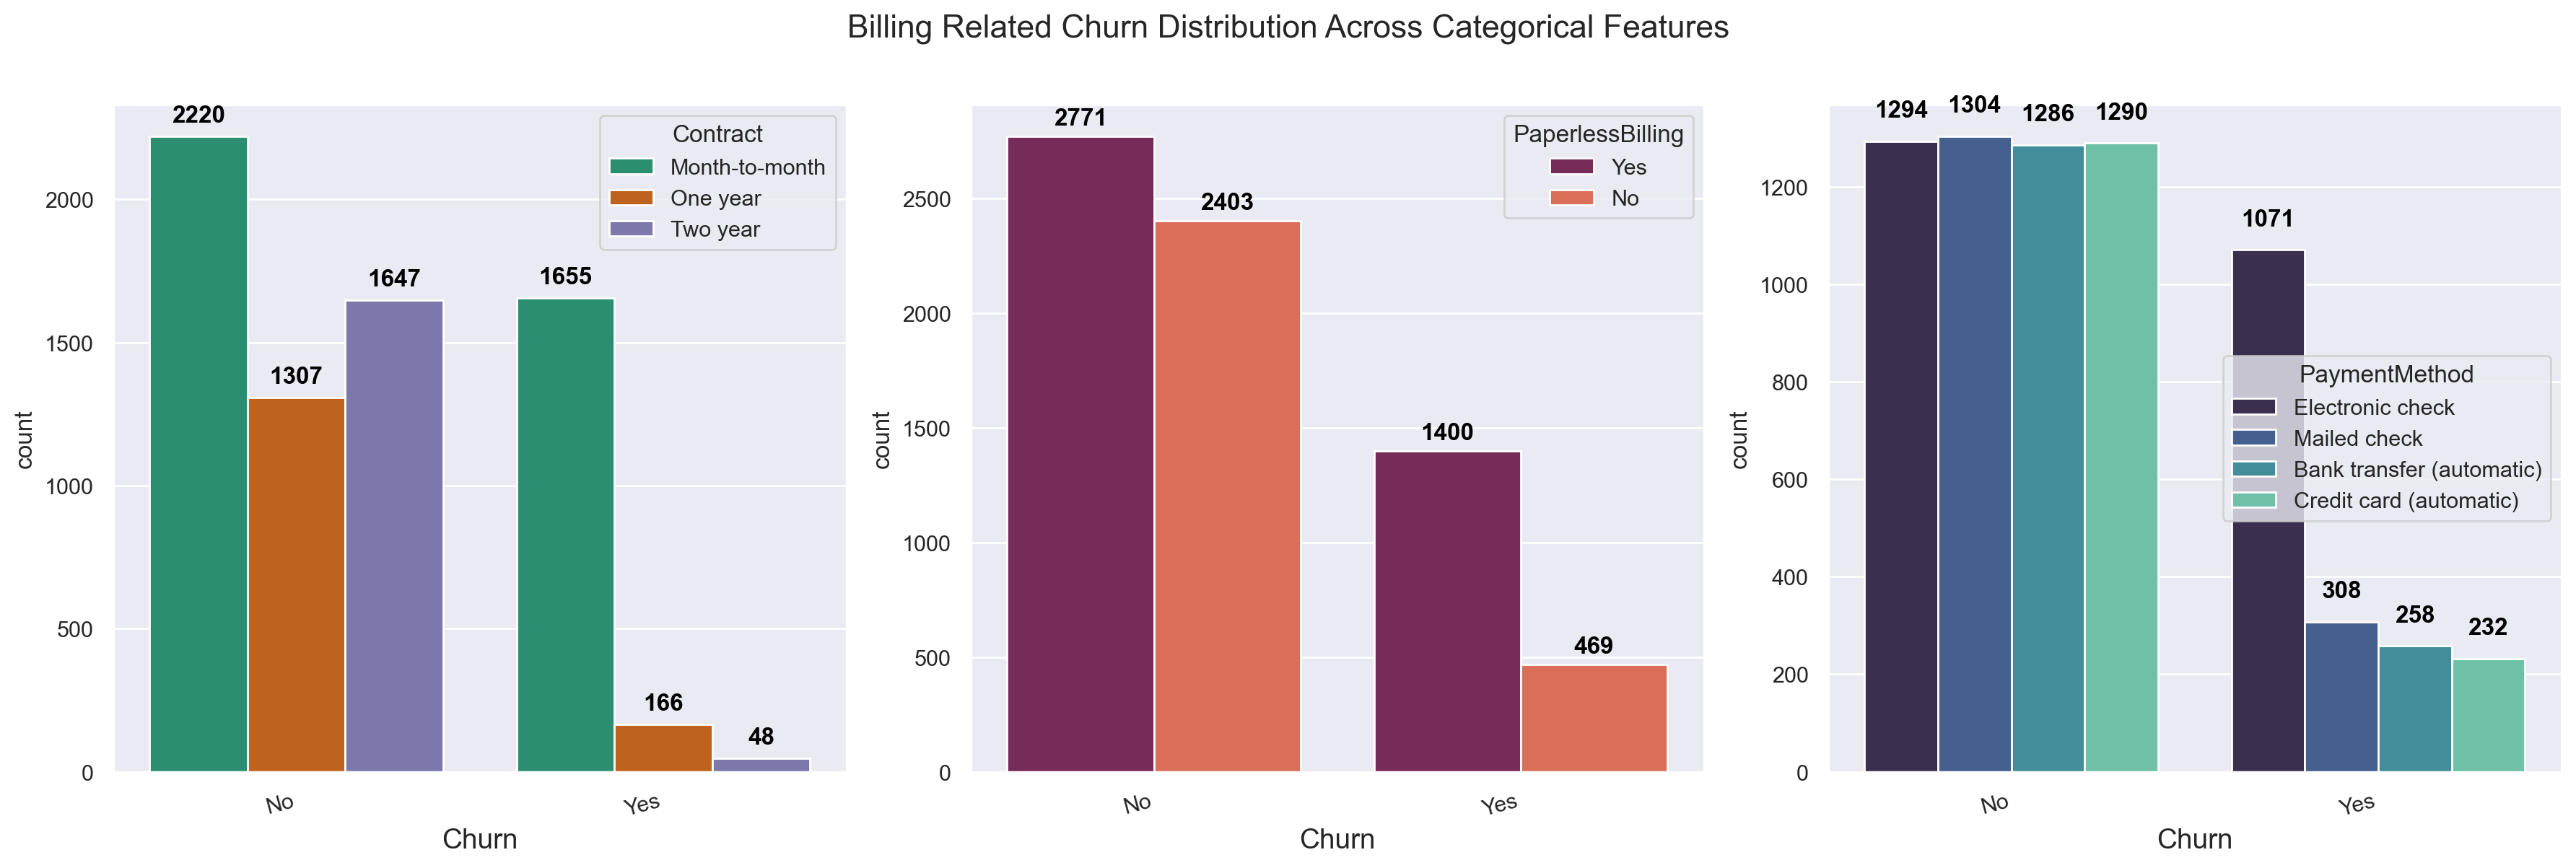

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical features to plot
billing_related_feat = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# List of color palettes for variety
palettes = ['Dark2', 'rocket', 'mako']

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Loop through features and plot them
for i, feature in enumerate(billing_related_feat):
    sns.countplot(x='Churn', data=df, hue=feature, ax=ax[i], palette=palettes[i])
    ax[i].set_xlabel('Churn', fontsize=14)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=15, ha="right")

    # Add total count on top of each bar
    for p in ax[i].patches:
        height = p.get_height()
        if height > 0:  # Avoid printing text on bars with zero height
            ax[i].text(p.get_x() + p.get_width() / 2, height + 50, f'{int(height)}',
                       ha='center', fontsize=12, fontweight='bold', color='black')

fig.suptitle('Billing Related Churn Distribution Across Categorical Features', fontsize=16, y=1)
plt.tight_layout()
plt.show()

* Month-to-month based contracts are more tend to churn when comparing one year and two year contracts.
* PaperlessBilling shows a significant rate of customer churn.
* Customers that have used the Electronic check payment method are clearly likely to churn, 1071 cutomers are churned out of 2365 customers


## **2. Plotting all numerical features**

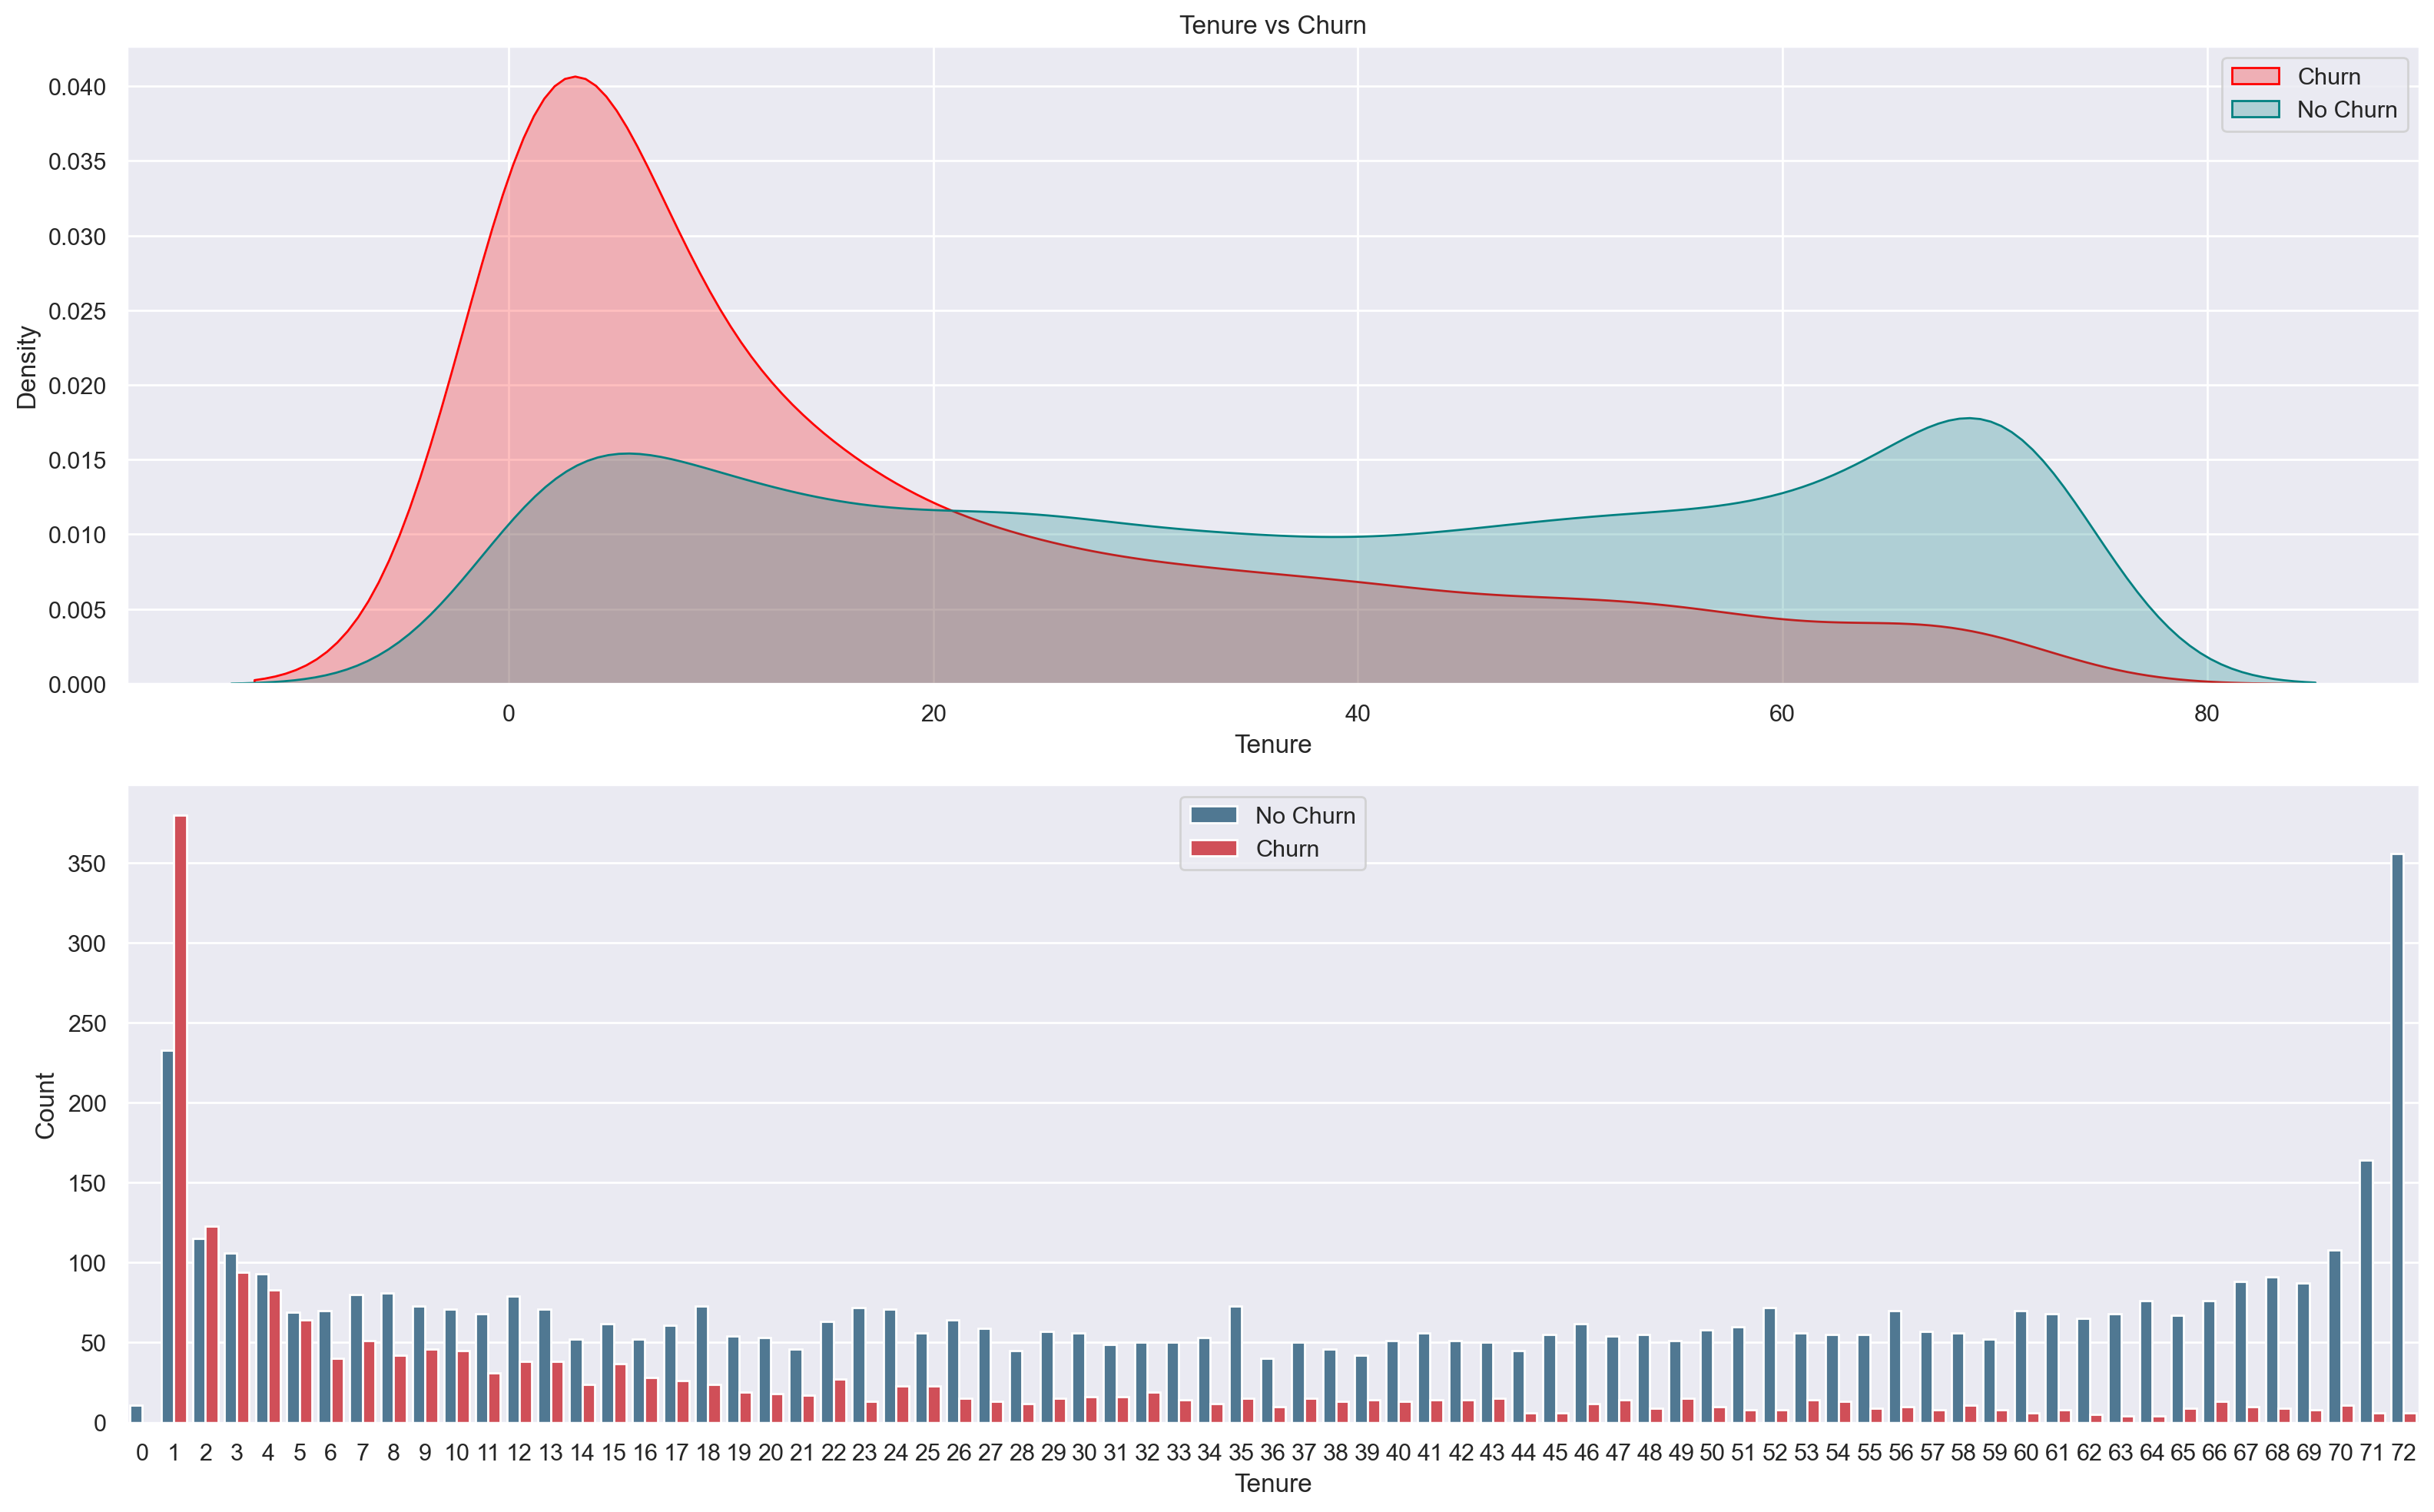

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

# Density Plot for Churn vs Tenure
sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'], fill=True, color='red', ax=axes[0])
sns.kdeplot(df[df['Churn'] == 'No']['tenure'], fill=True, color='teal', ax=axes[0])

axes[0].set_xlabel("Tenure")
axes[0].set_ylabel("Density")
axes[0].set_title("Tenure vs Churn")
axes[0].legend(['Churn', 'No Churn'])

# Countplot for Tenure
sns.countplot(data=df, x="tenure",hue="Churn", palette=["#457B9D", "#E63946"], ax=axes[1])
axes[1].set_xlabel("Tenure")
axes[1].set_ylabel("Count")
axes[1].legend(['No Churn','Churn'])

plt.tight_layout()
plt.show()

* There is a sharp peak near 0 tenure, meaning many customers churn very early after subscribing.
* This indicates that customers who stay past the initial months tend to remain for much longer.
* As tenure increases beyond 30-40 months, the churn rate becomes significantly lower.
* Customers who cross a certain tenure threshold (50+ months) are much less likely to churn.


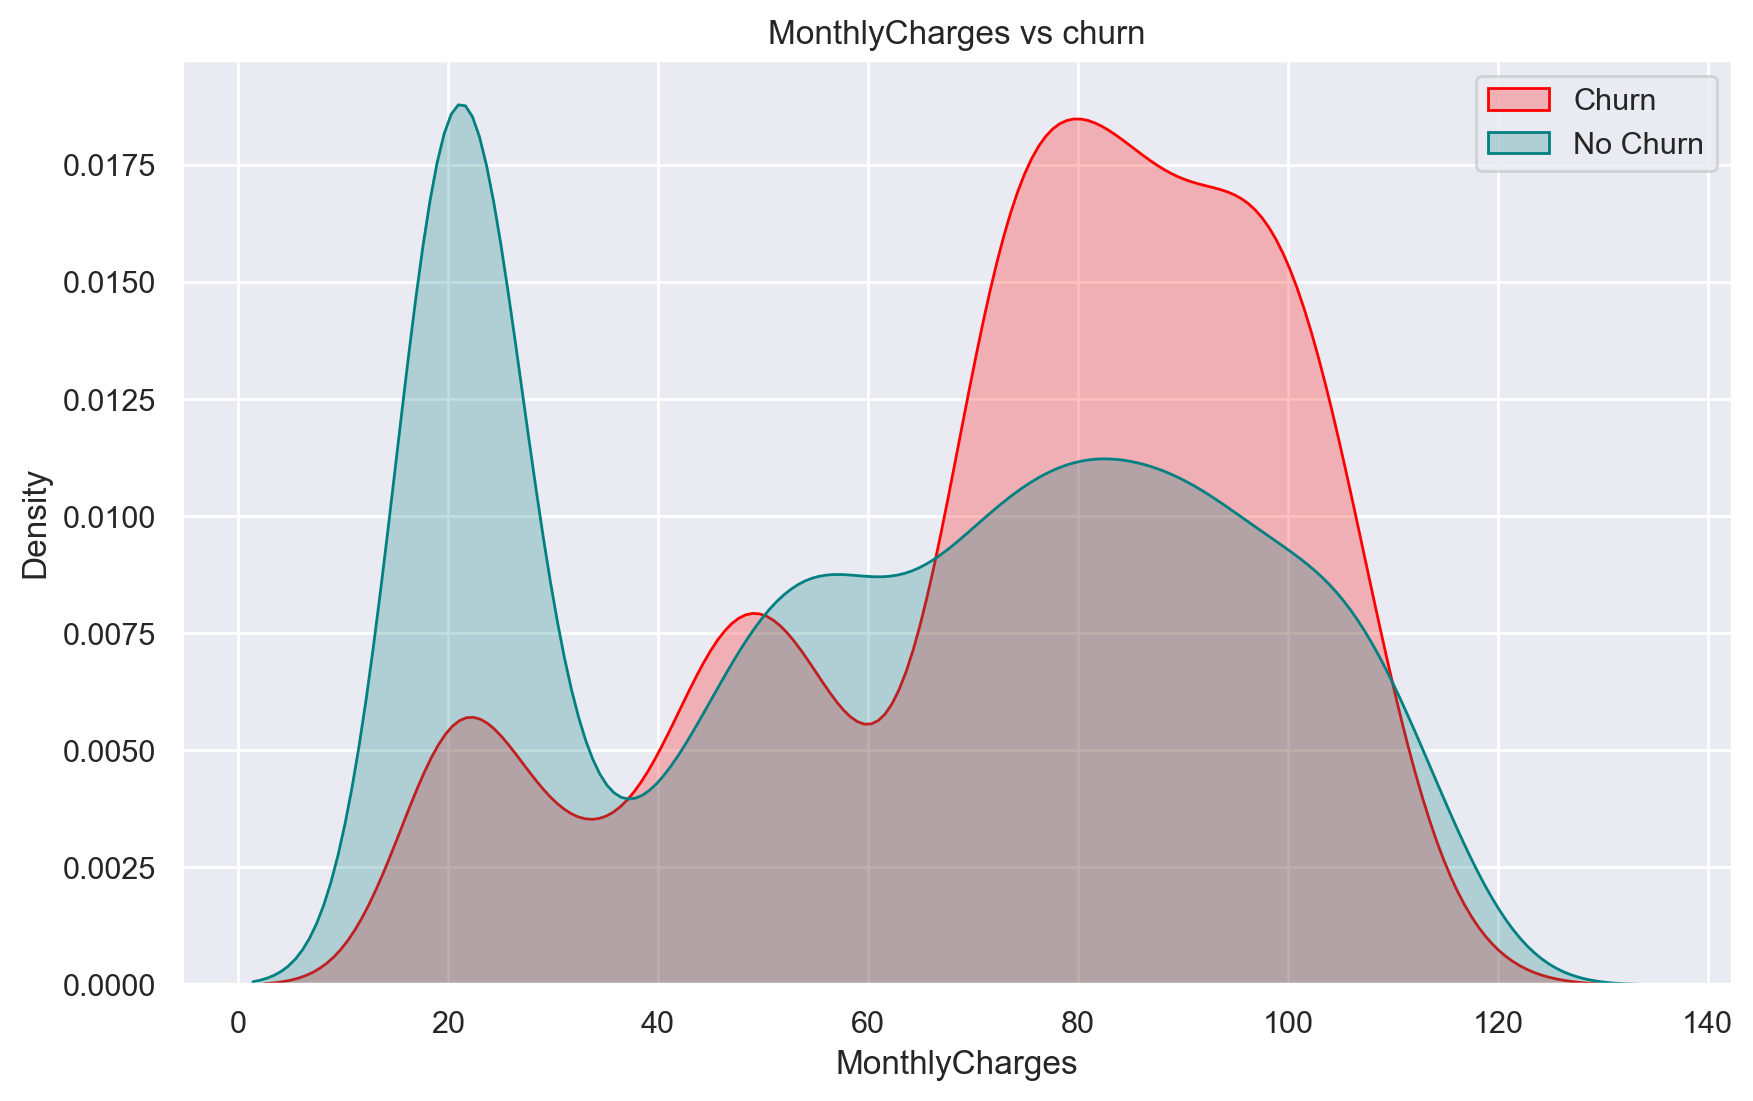

In [43]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], fill=True, color='red')
sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], fill=True, color='teal')
plt.xlabel("MonthlyCharges")
plt.ylabel("Density")
plt.title("MonthlyCharges vs churn")
plt.legend(['Churn', 'No Churn'])
plt.show()

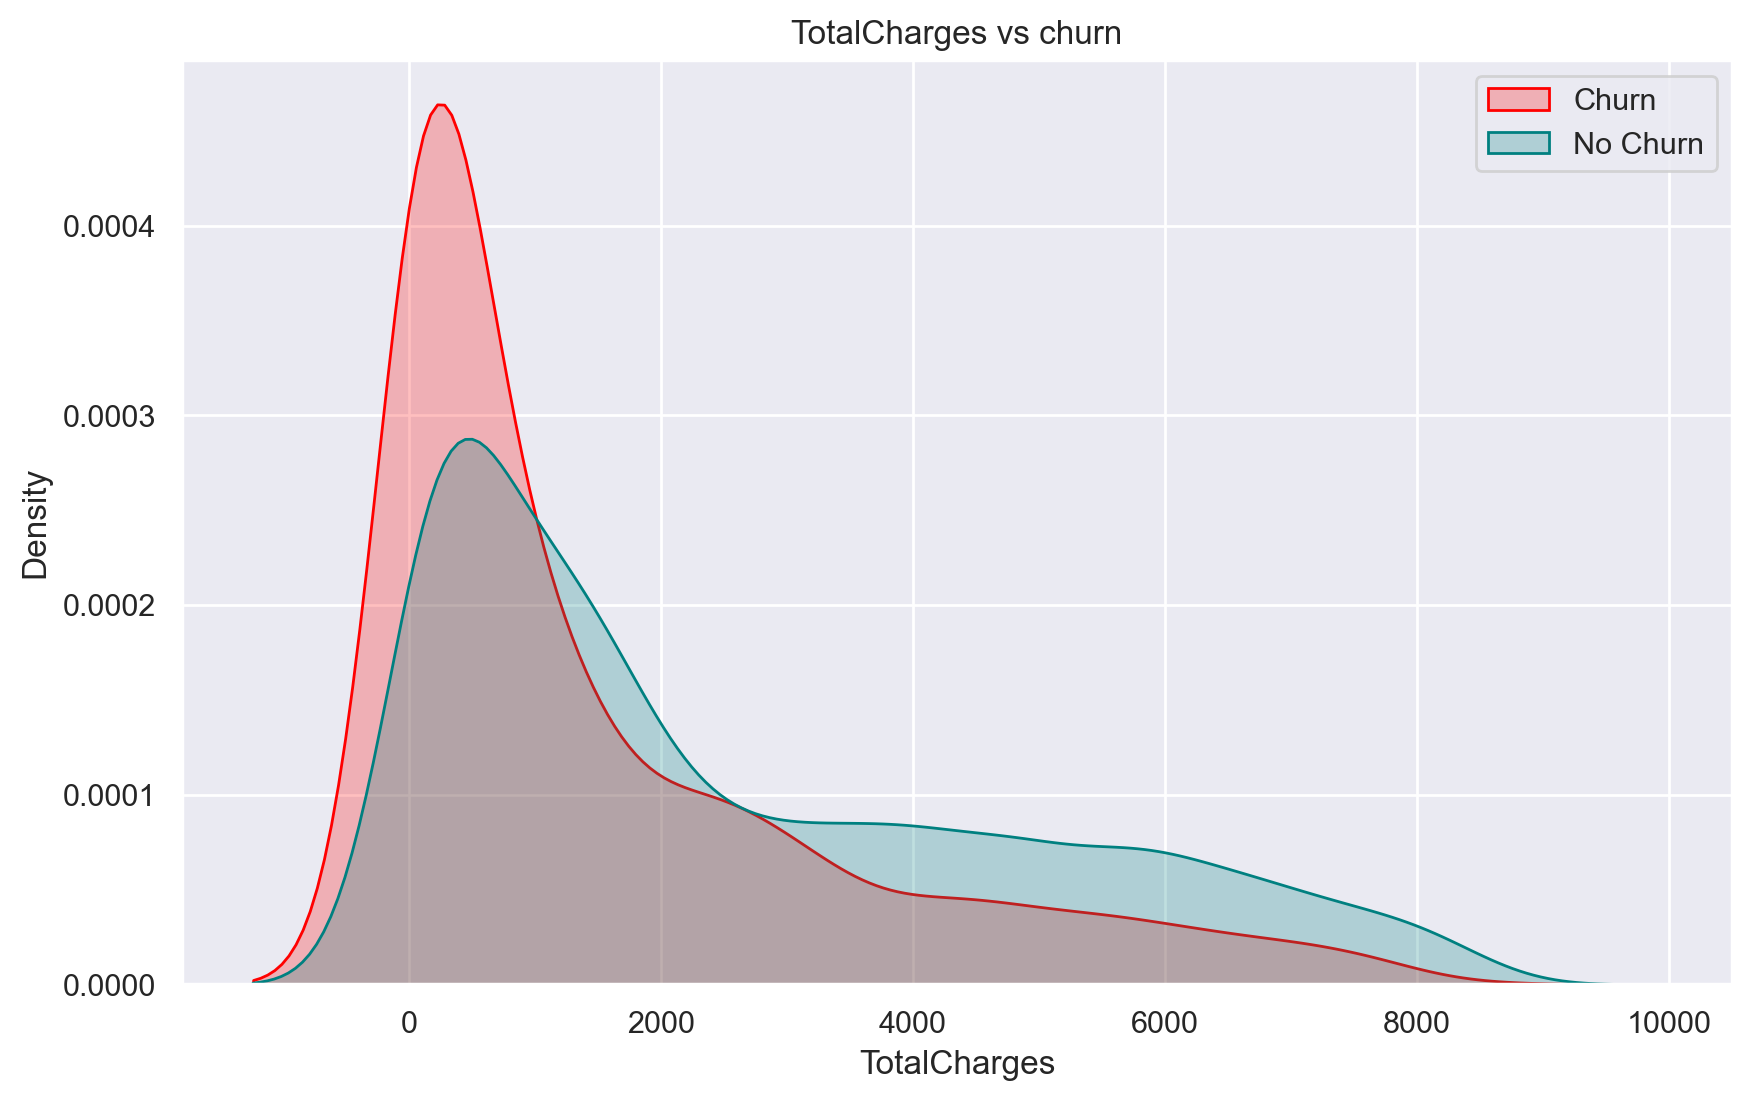

In [44]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Churn'] == 'Yes']['TotalCharges'], fill=True, color='red')
sns.kdeplot(df[df['Churn'] == 'No']['TotalCharges'], fill=True, color='teal')

plt.xlabel("TotalCharges")
plt.ylabel("Density")
plt.title("TotalCharges vs churn")
plt.legend(['Churn', 'No Churn'])
plt.show()

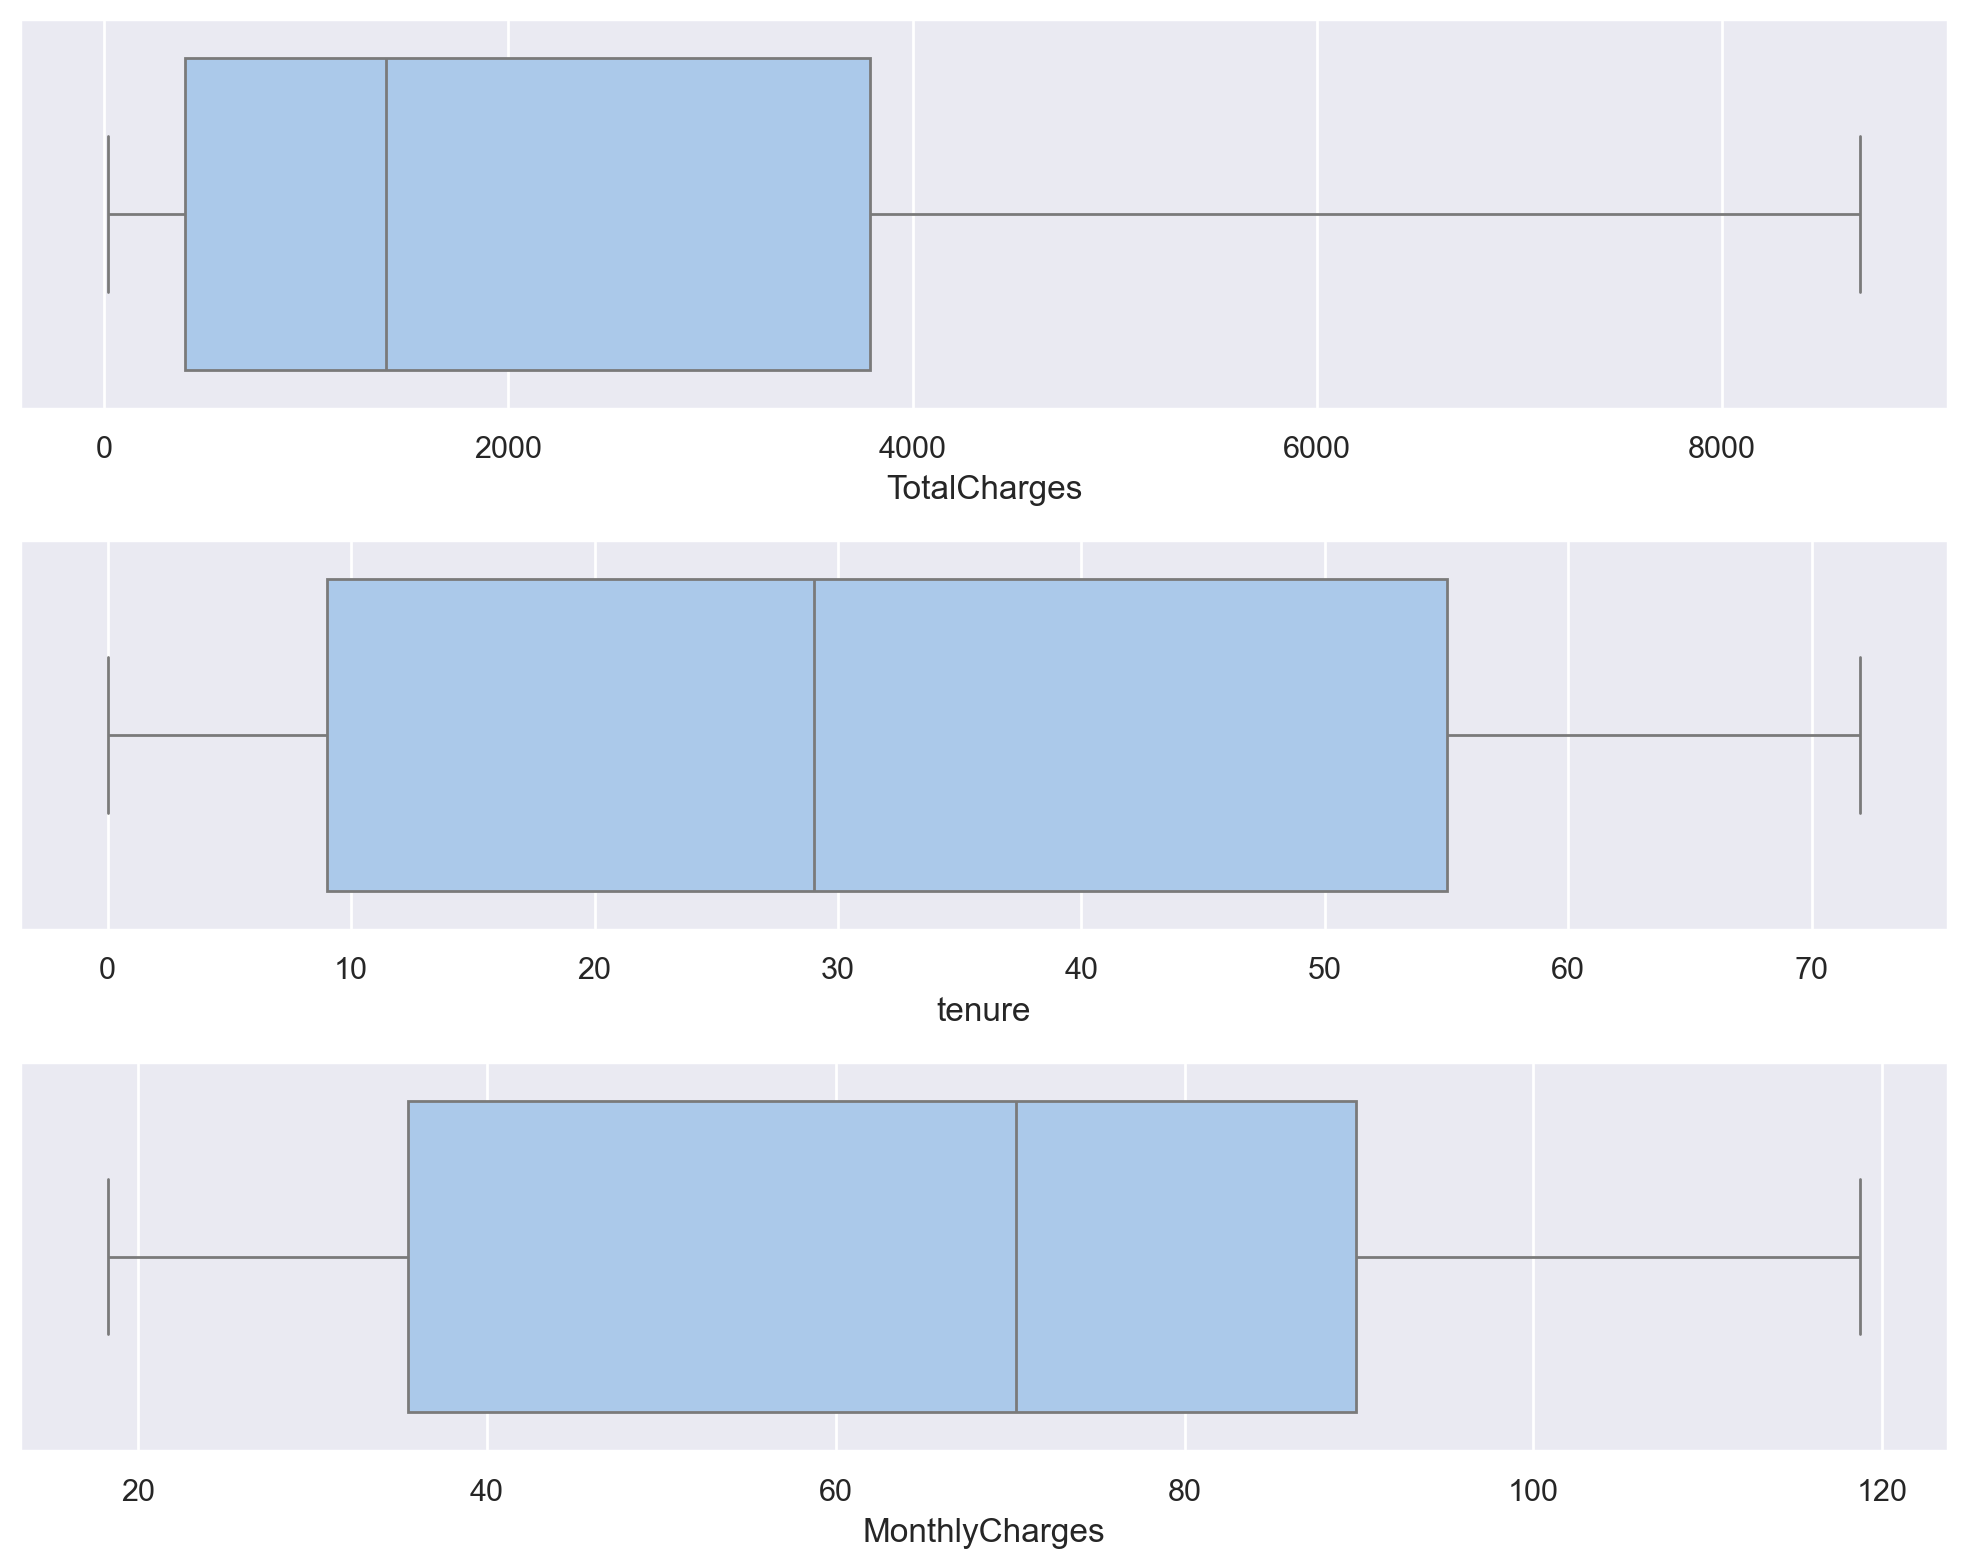

In [45]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))
sns.boxplot(x="TotalCharges", data=df,ax=axes[0])
sns.boxplot(x="tenure", data=df,ax=axes[1])
sns.boxplot(x="MonthlyCharges", data=df,ax=axes[2])
plt.tight_layout()
plt.show()

* As shown in above figure no outliers are visible

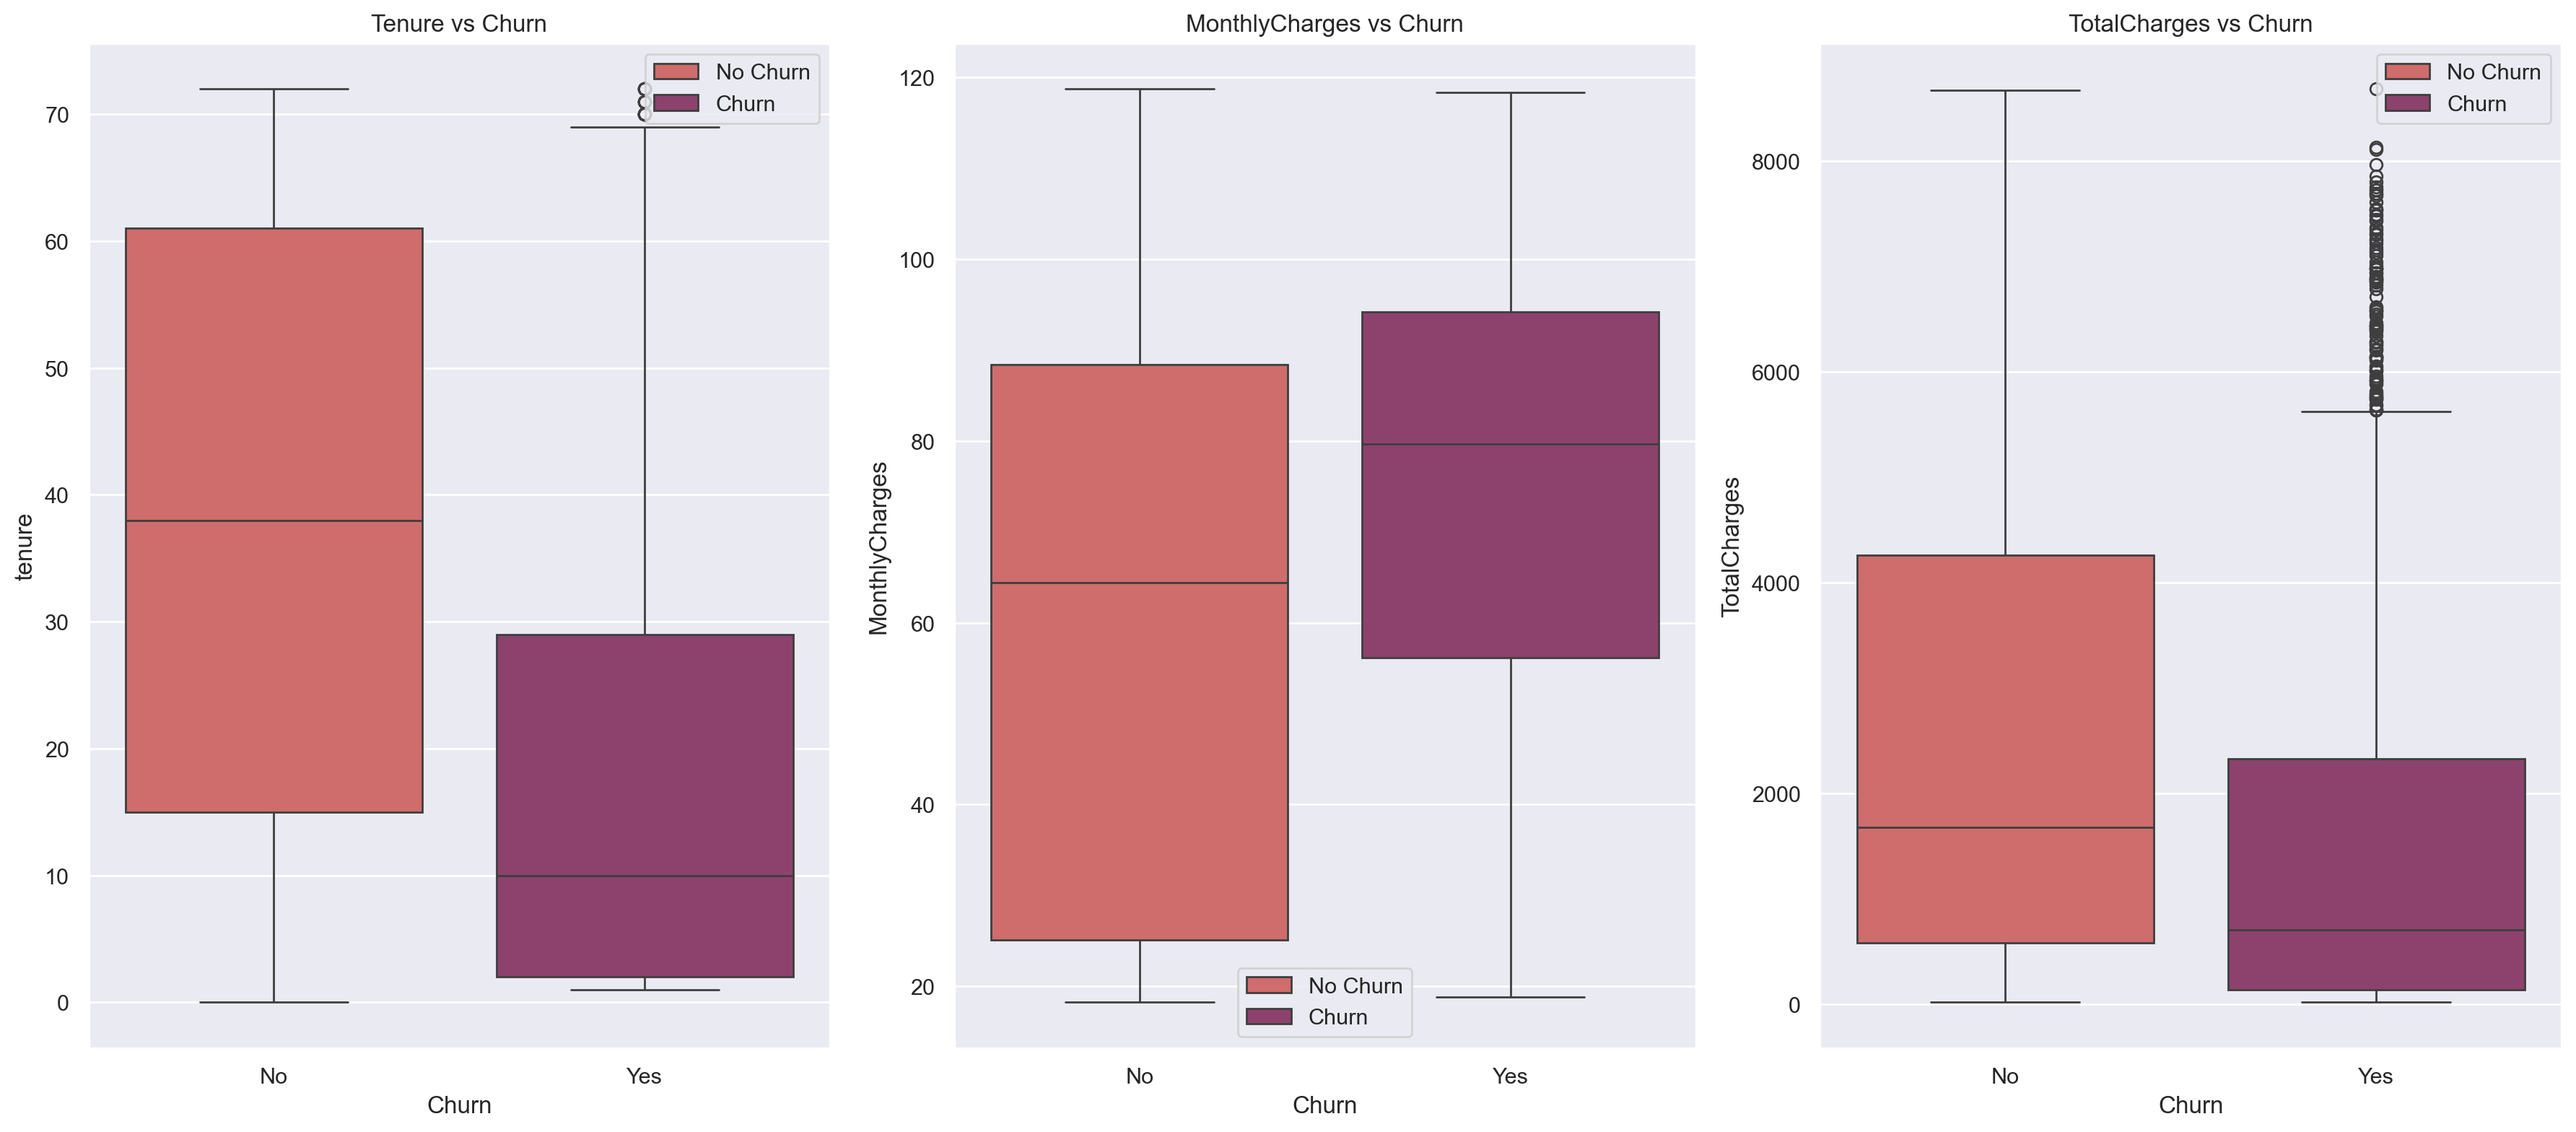

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8)) 

# Boxplots for Churn vs Tenure, MonthlyCharges, and TotalCharges
sns.boxplot(data=df,x="Churn", y="tenure", palette="flare", ax=axes[0])
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("tenure")
axes[0].set_title("Tenure vs Churn")
axes[0].legend(['No Churn','Churn'])

sns.boxplot(data=df,x="Churn", y="MonthlyCharges", palette="flare", ax=axes[1])
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("MonthlyCharges")
axes[1].set_title("MonthlyCharges vs Churn")
axes[1].legend(['No Churn','Churn'])

sns.boxplot(data=df,x="Churn", y="TotalCharges", palette="flare", ax=axes[2])
axes[2].set_xlabel("Churn")
axes[2].set_ylabel("TotalCharges")
axes[2].set_title("TotalCharges vs Churn")
axes[2].legend(['No Churn','Churn'])

plt.tight_layout()
plt.show()

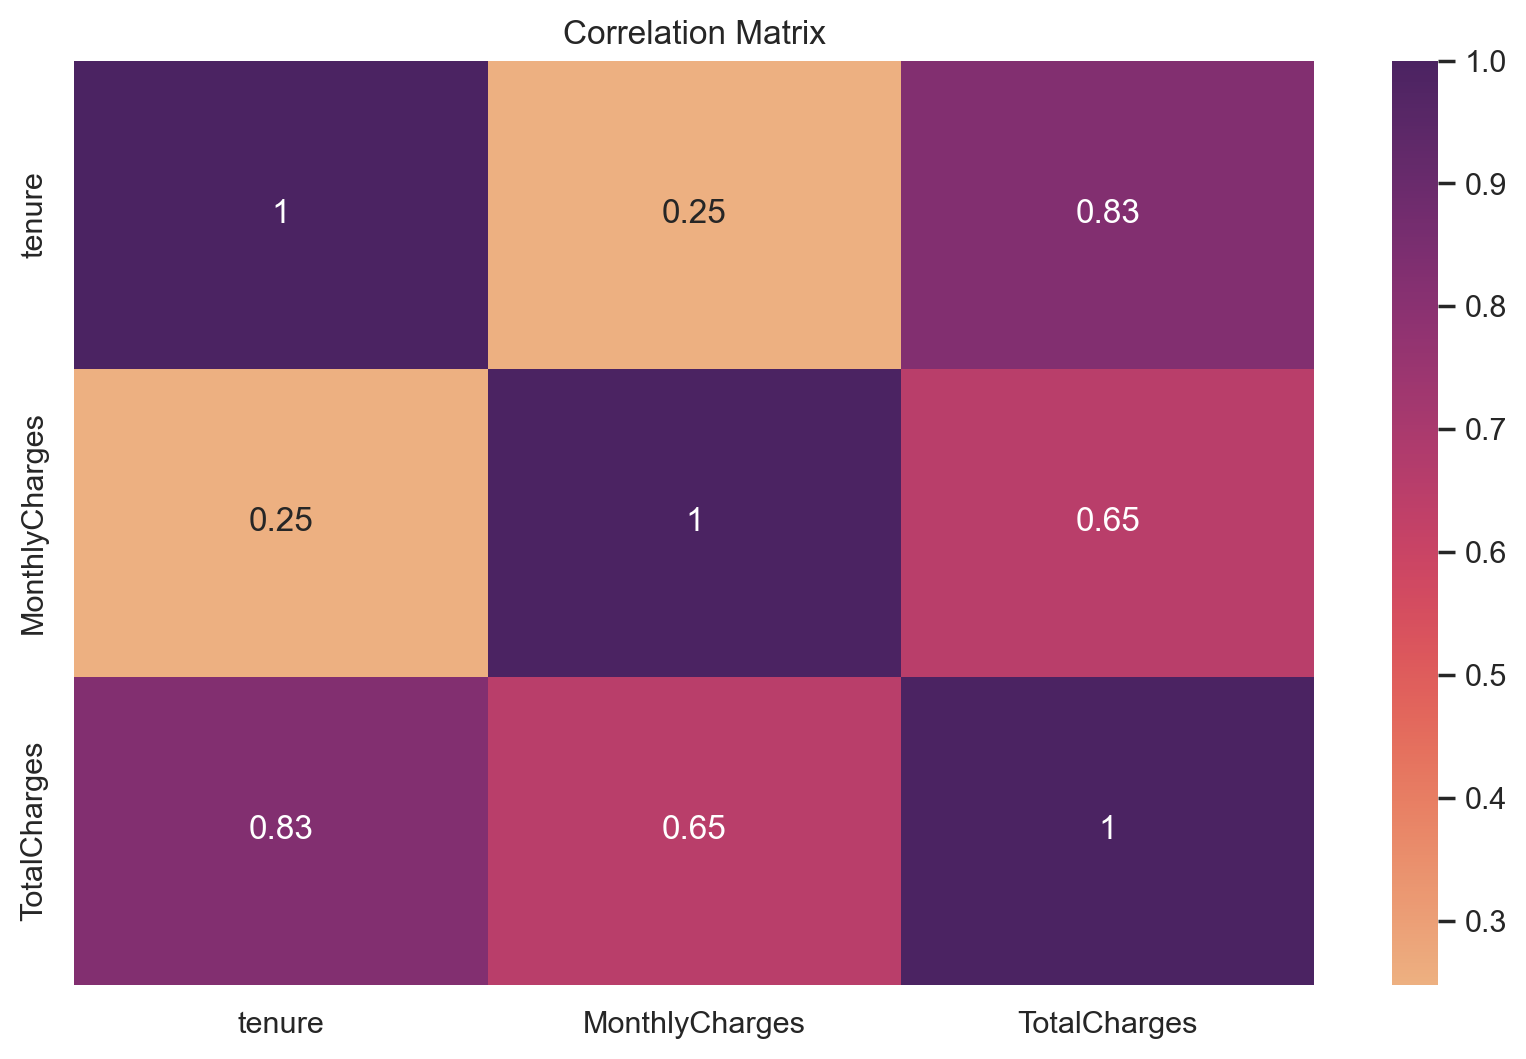

In [47]:
# Heating map for correlation matrix
billing_related_feat= df[['tenure', 'MonthlyCharges','TotalCharges']]
plt.figure(figsize=(10, 6))
sns.heatmap(billing_related_feat.corr(), cmap = 'flare', annot = True)
plt.title('Correlation Matrix')
plt.show()

* Correlation is visible between tenure and TotalCharges

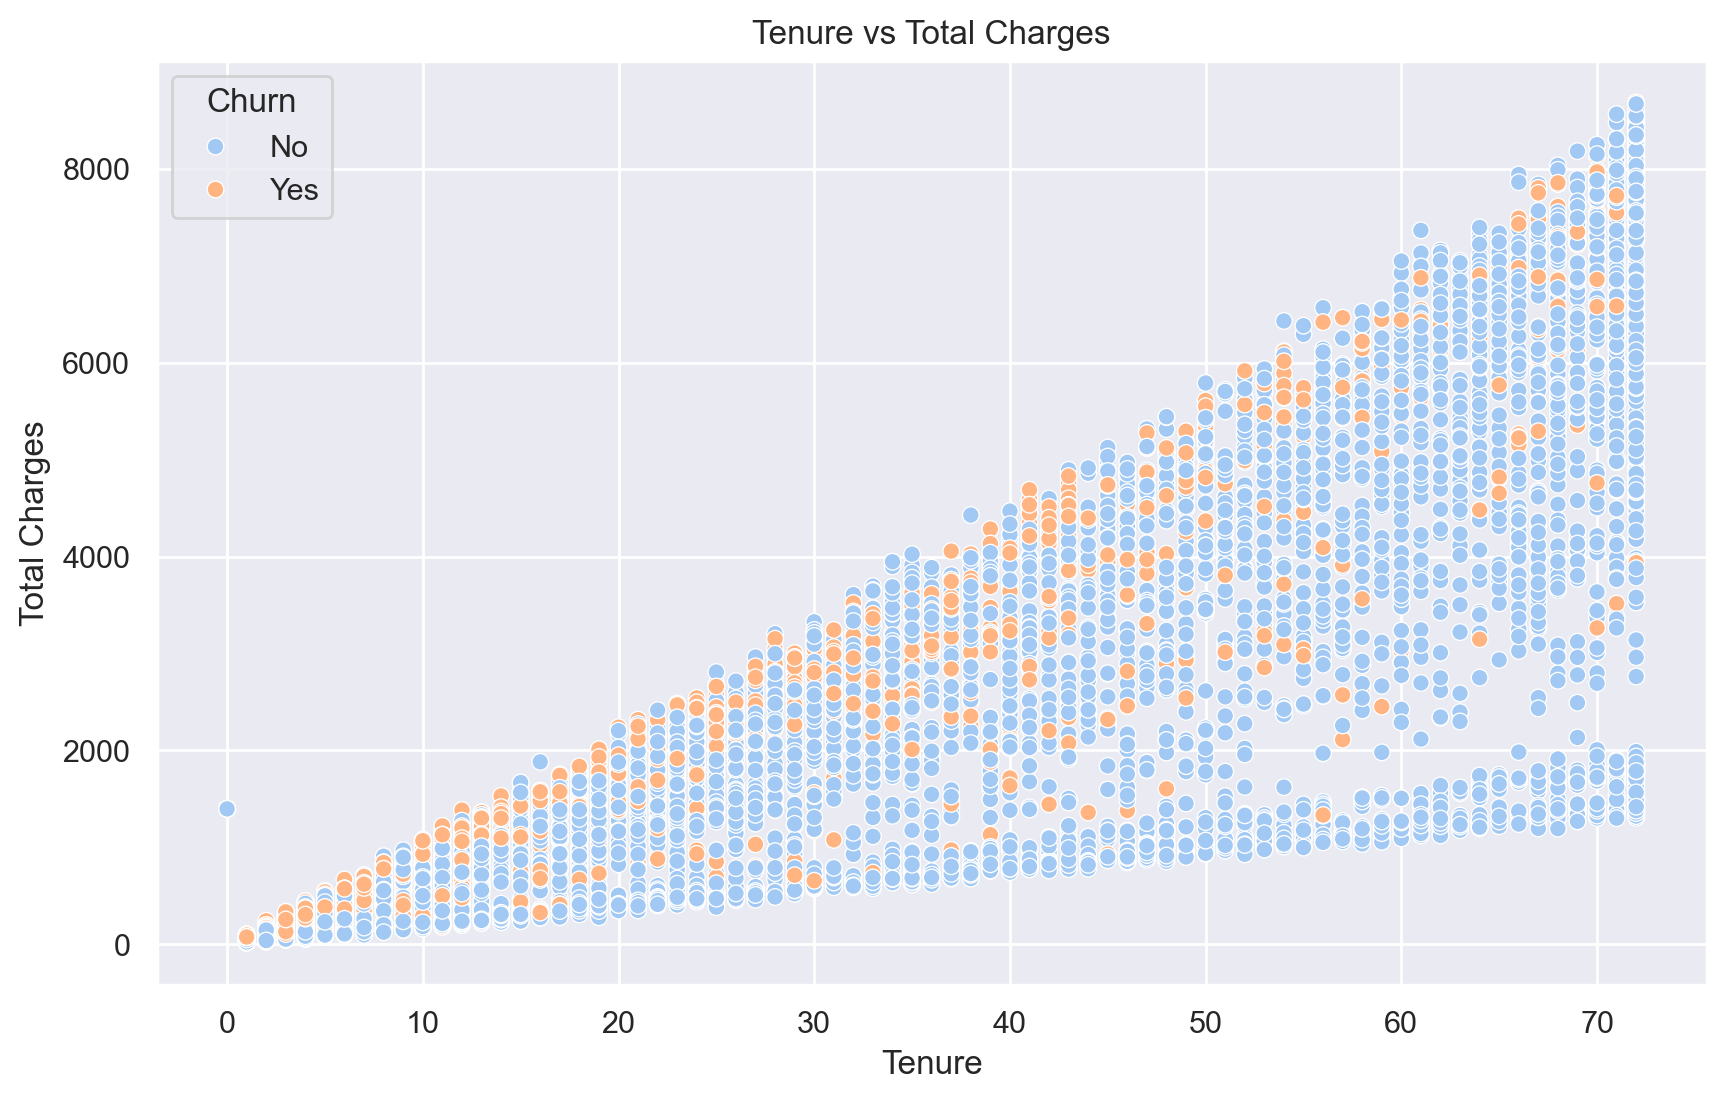

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,x ='tenure', y ='TotalCharges',hue="Churn")
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.title('Tenure vs Total Charges')
plt.show()

# **Data Preprocessing**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Label encoding

In [50]:
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [51]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [52]:
# Apply label encoder for categorical values
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [53]:
df = df.apply(lambda x: object_to_int(x))
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

### Training and testing split

In [54]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Churn'])  # Feature matrix
y = df['Churn']  # Target variable

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True, stratify=y)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (5634, 19), Test set: (1409, 19)


### Feature scaling

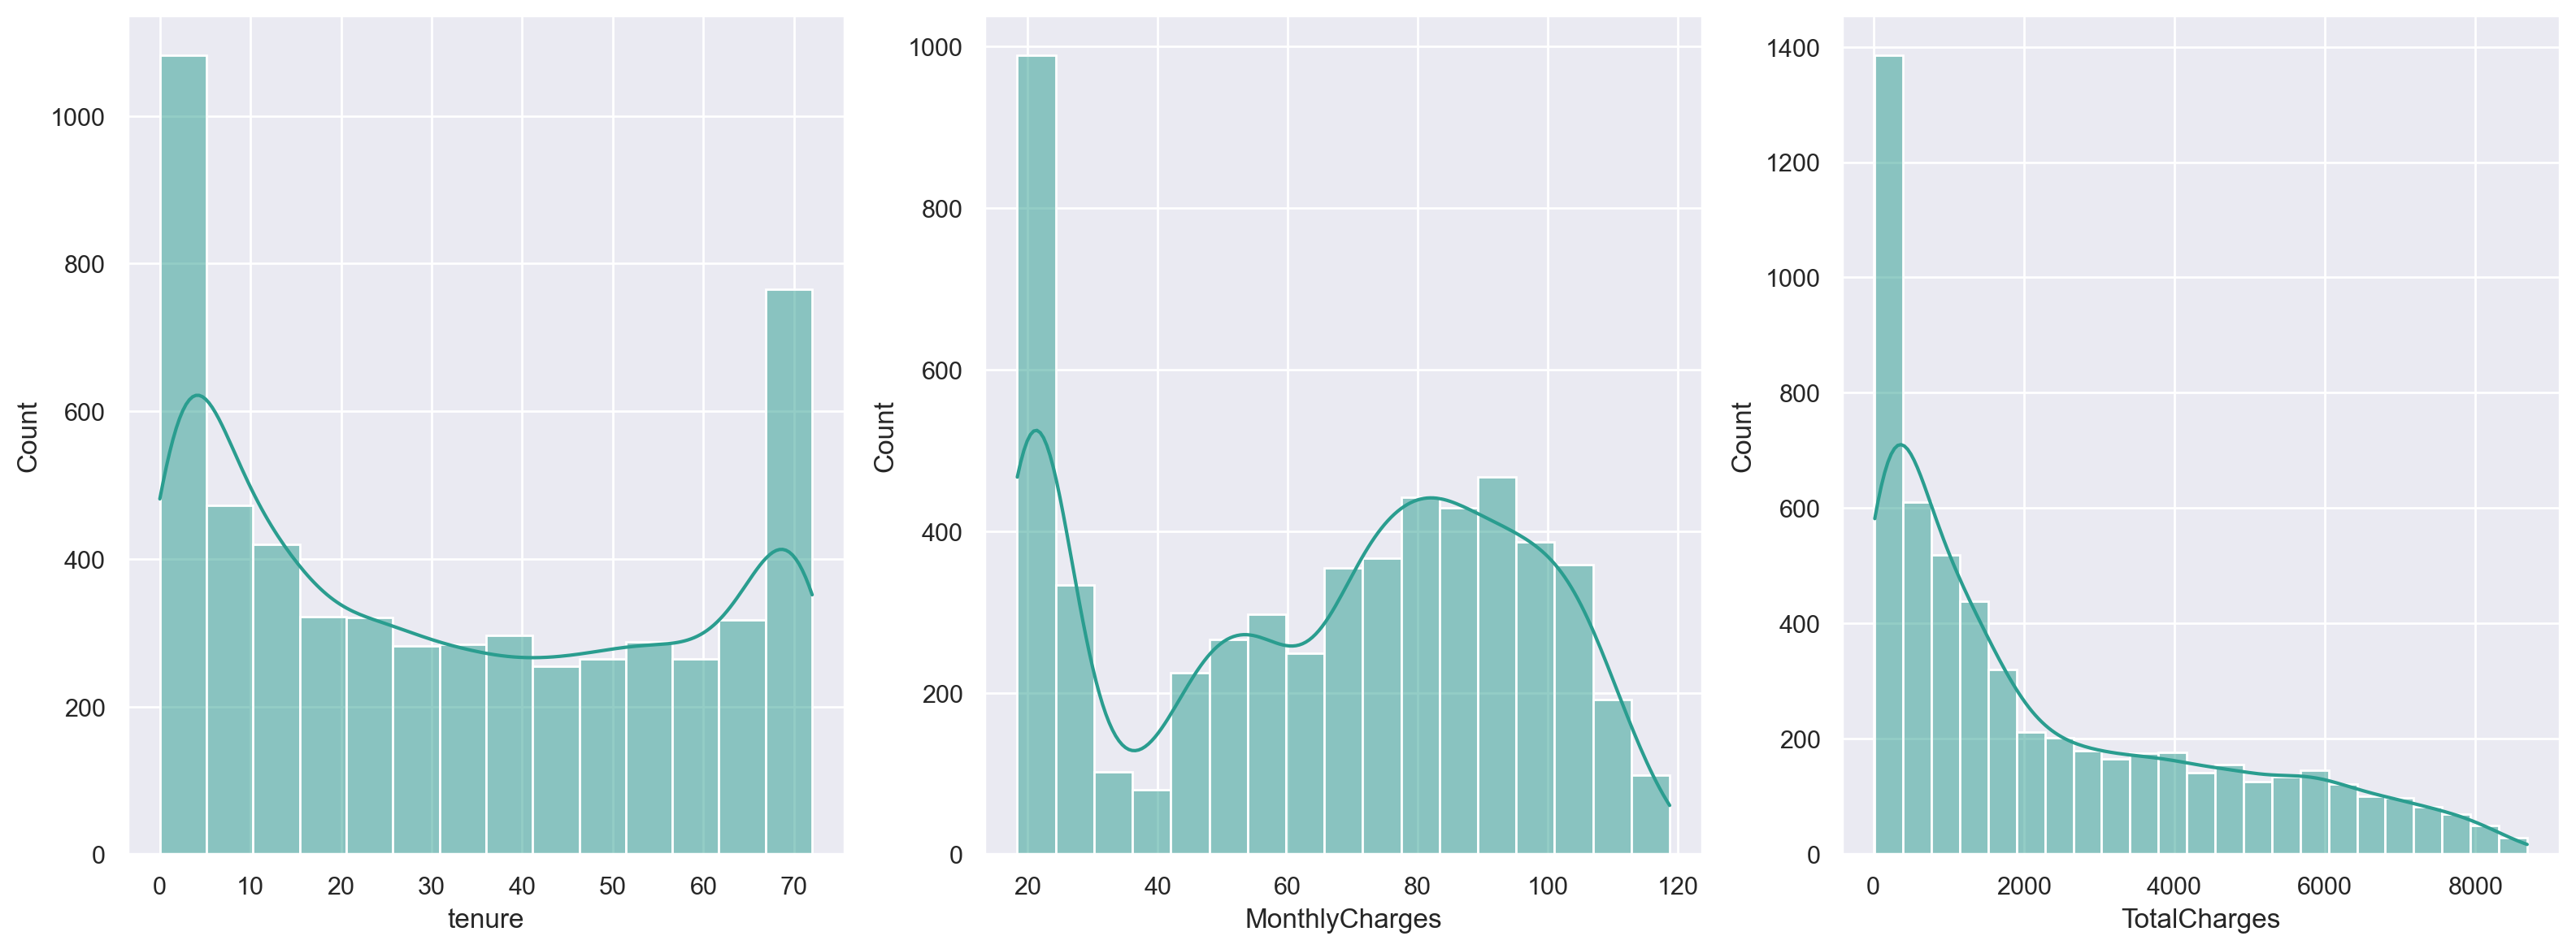

In [55]:
fig , ax = plt.subplots(1,3, figsize=(16,6))

sns.histplot(X_train['tenure'], ax=ax[0],kde=True,color="#2A9D8F")
sns.histplot(X_train['MonthlyCharges'], ax=ax[1],kde=True,color="#2A9D8F")
sns.histplot(X_train['TotalCharges'], ax=ax[2],kde=True,color="#2A9D8F")

plt.tight_layout()
plt.show()

In [56]:
# Initialize the standard scaler
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Fit the scaler on training data only
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Transform the test data using the same scaler
X_test[num_cols] = scaler.transform(X_test[num_cols])  # No fit() here, only transform


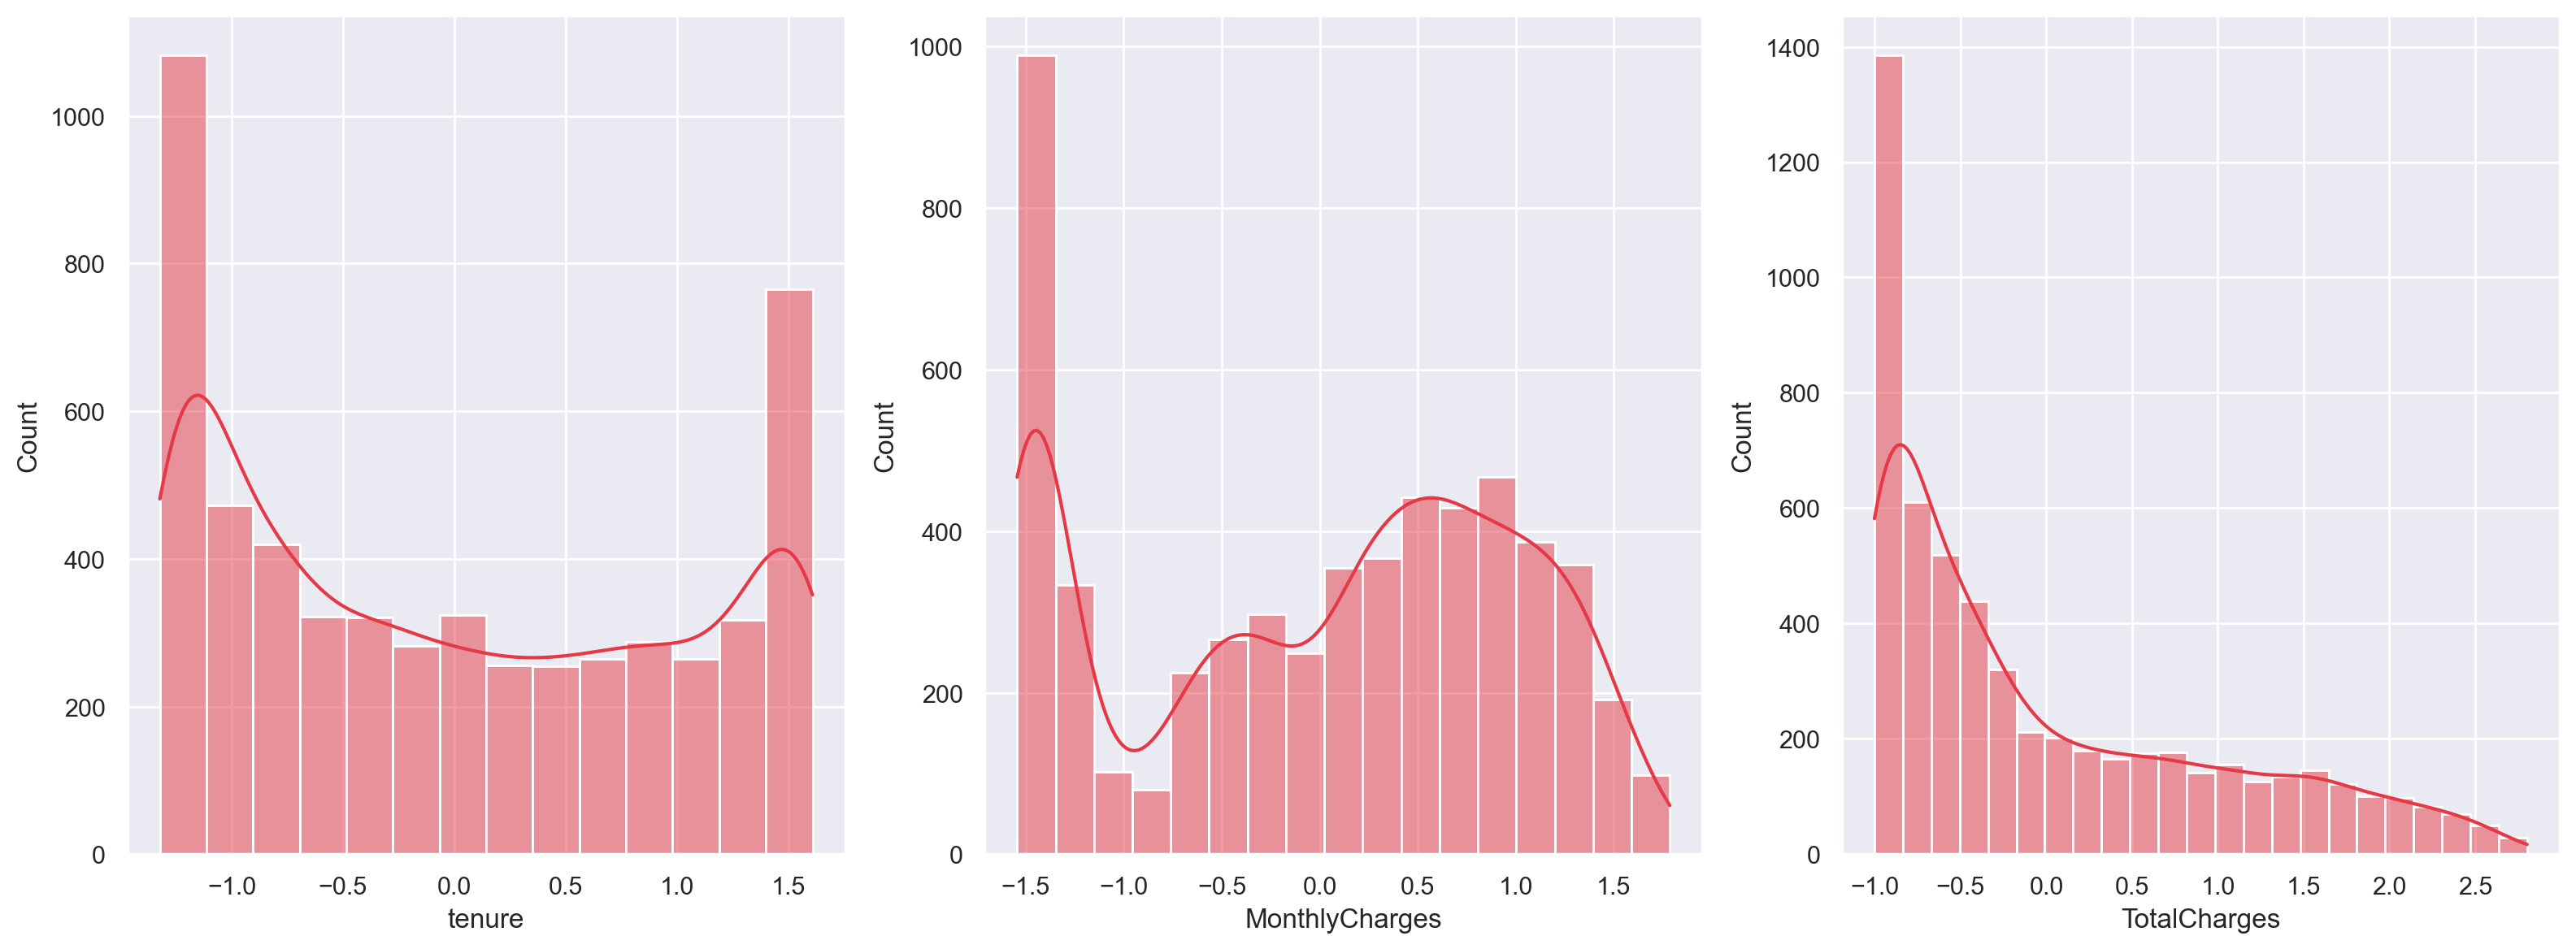

In [57]:
fig , ax = plt.subplots(1,3, figsize=(16,6))

sns.histplot(X_train['tenure'], ax=ax[0],kde=True,color="#E63946")
sns.histplot(X_train['MonthlyCharges'], ax=ax[1],kde=True,color="#E63946")
sns.histplot(X_train['TotalCharges'], ax=ax[2],kde=True,color="#E63946")
plt.tight_layout()
plt.show()

In [58]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

This dataset is an imbalanced dataset therefore we need to solve this otherwise this will lead to overfitting.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


### Resampling

In [60]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print(y_train_resampled.value_counts())

Churn
0    4139
1    4139
Name: count, dtype: int64


In [61]:
df.isnull().sum()  # Check for any missing values

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [62]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

# **Model Training**

### Logistic regression

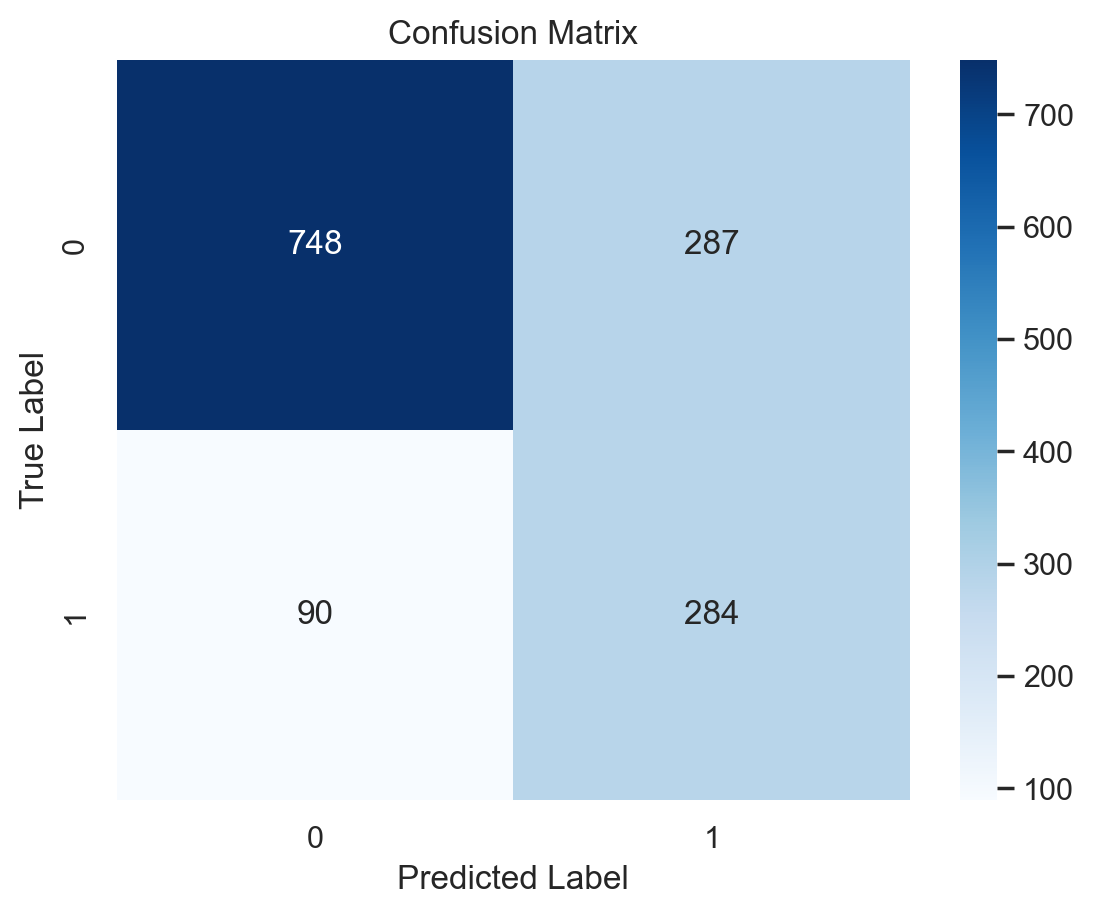

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80      1035
           1       0.50      0.76      0.60       374

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.79      0.73      0.75      1409



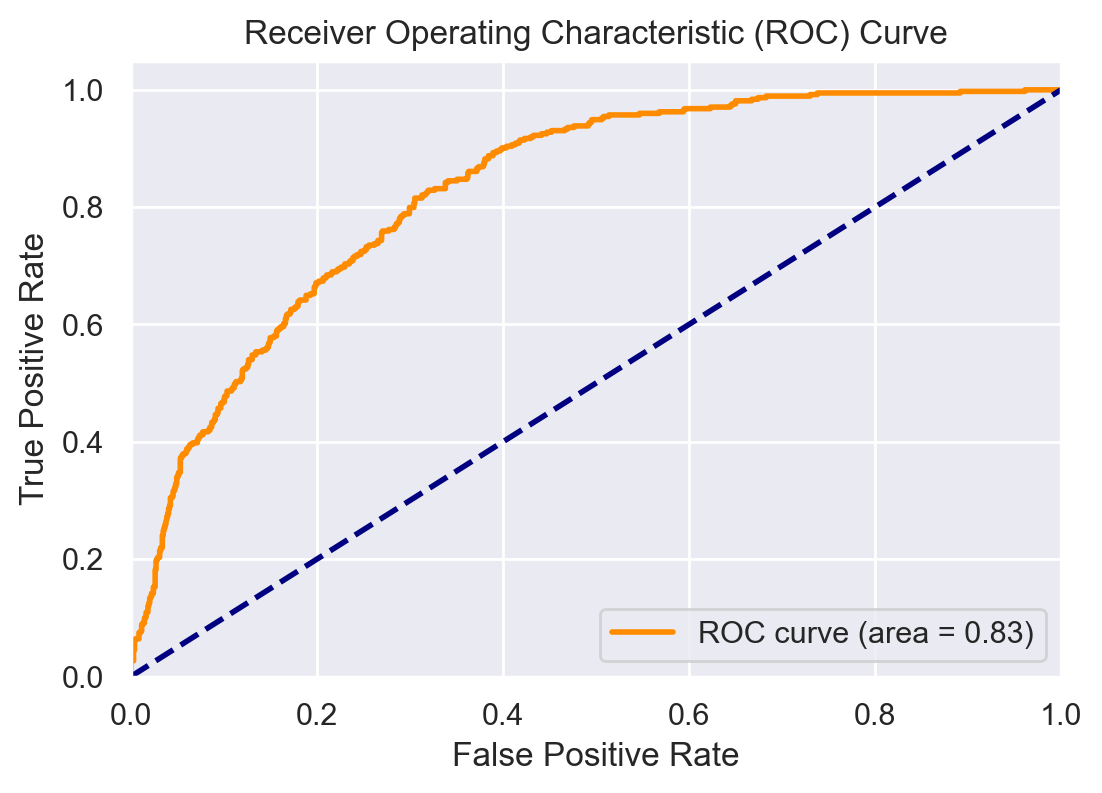

In [55]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_lr = logreg.predict(X_test)

# Evaluate the model
# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Classification Report
class_report_lr = classification_report(y_test, y_pred_lr)

# ROC Curve and AUC
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plotting the confusion matrix using Seaborn for better visualization
plt.figure()
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Printing the Classification Report
print("Classification Report:\n", class_report_lr)

# Plotting the ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### KNN model

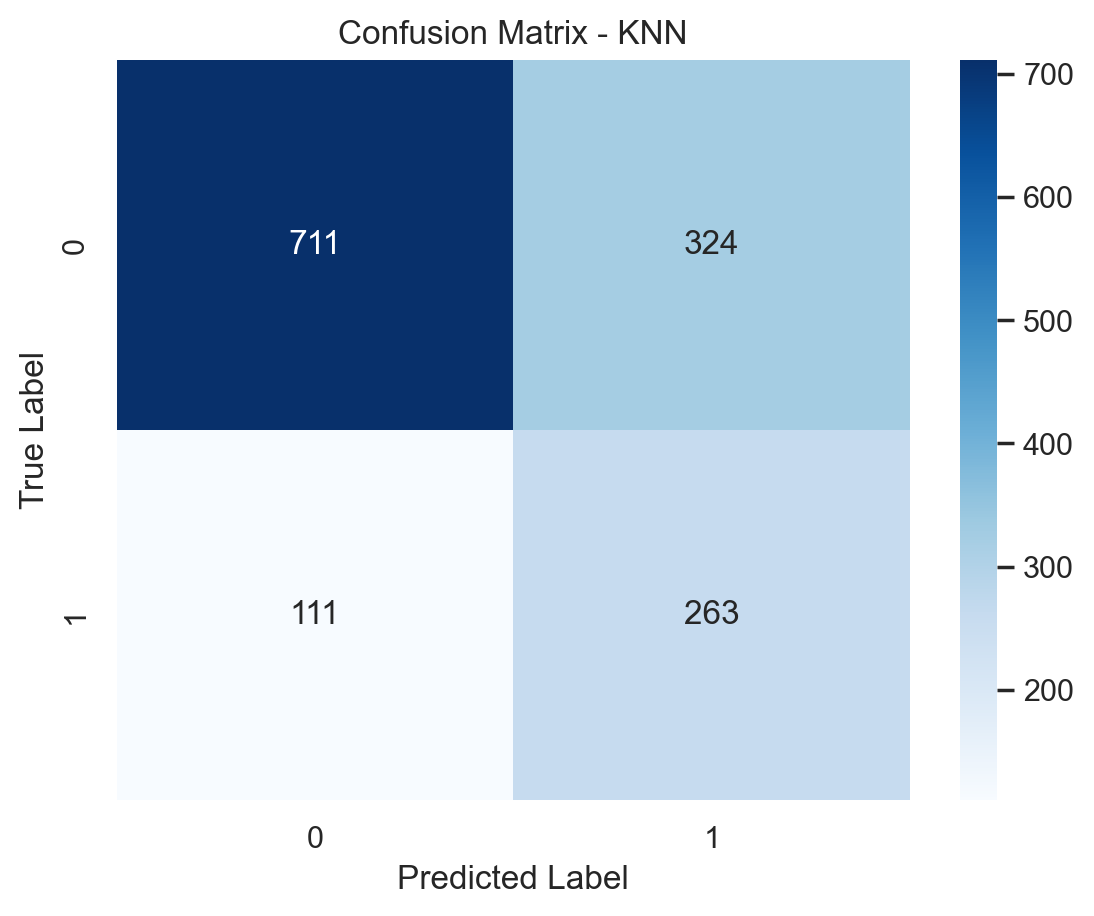

Classification Report - KNN:
               precision    recall  f1-score   support

           0       0.86      0.69      0.77      1035
           1       0.45      0.70      0.55       374

    accuracy                           0.69      1409
   macro avg       0.66      0.70      0.66      1409
weighted avg       0.75      0.69      0.71      1409



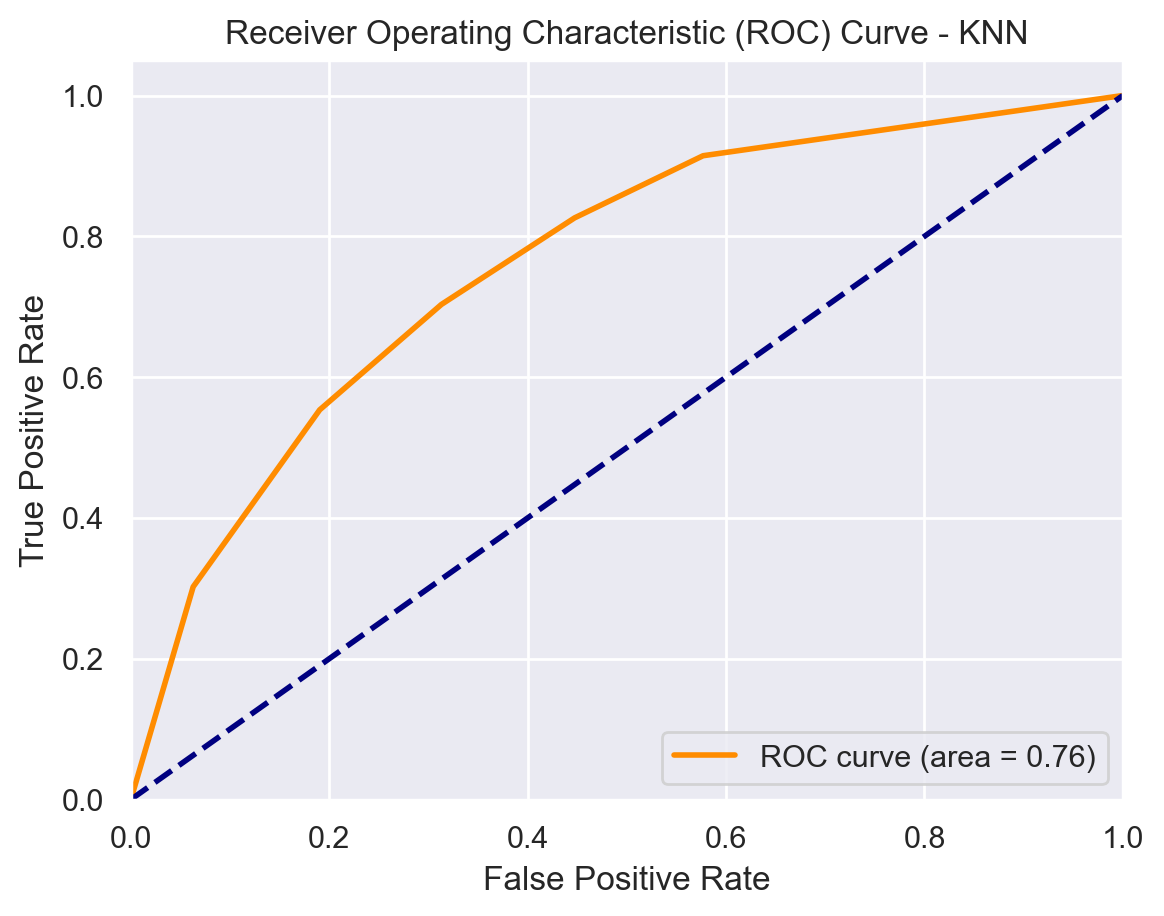

In [ ]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the resampled training data
knn_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Classification Report
class_report_knn = classification_report(y_test, y_pred_knn)

# ROC Curve and AUC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plotting the confusion matrix
plt.figure()
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Printing the Classification Report
print("Classification Report - KNN:\n", class_report_knn)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")
plt.show()

### Random forest model

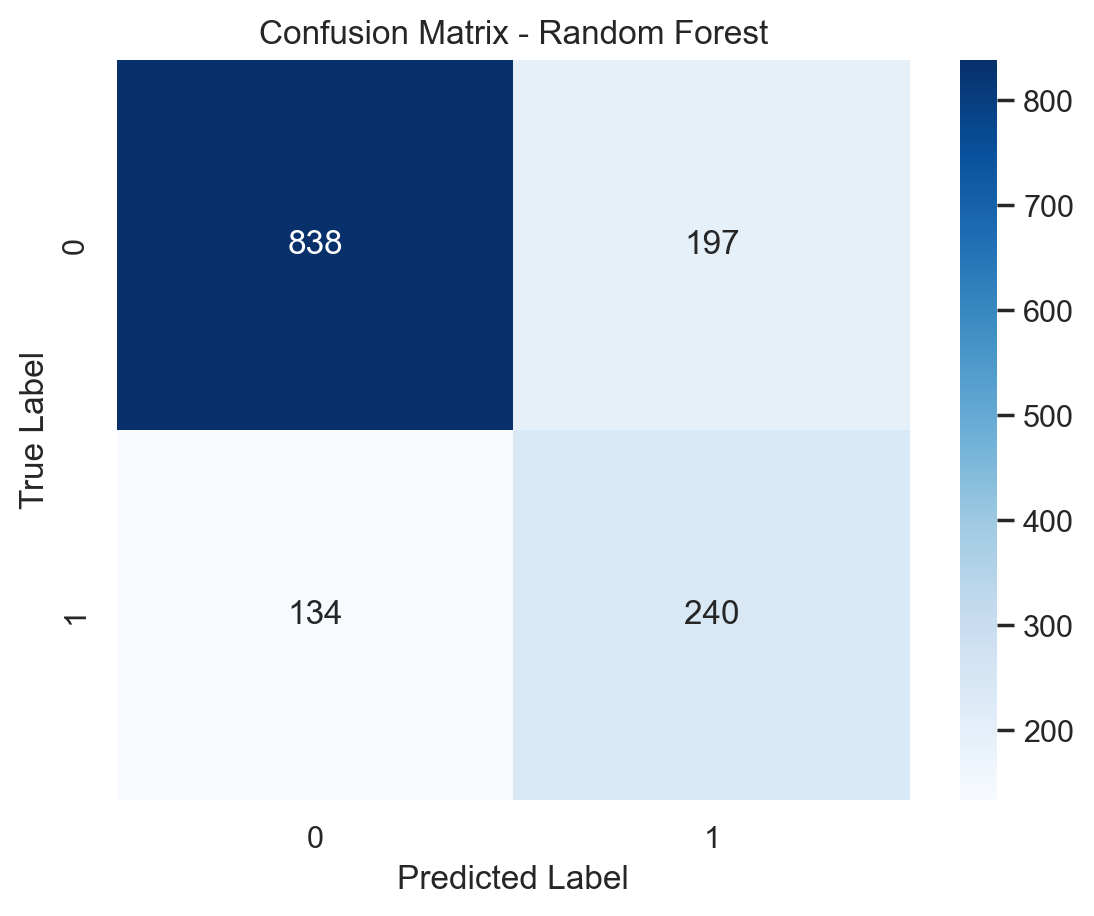

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84      1035
           1       0.55      0.64      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.71      1409
weighted avg       0.78      0.77      0.77      1409



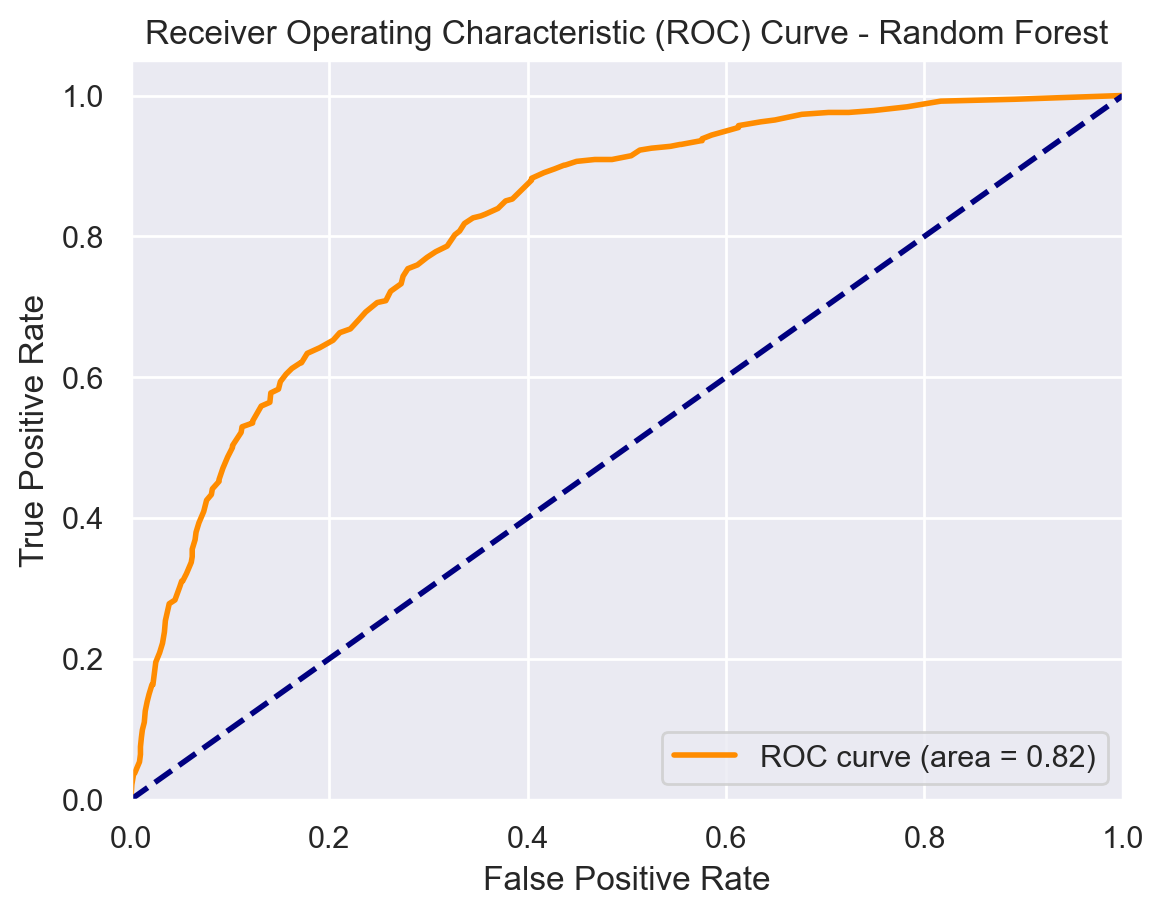

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)

# ROC Curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the confusion matrix
plt.figure()
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Printing the Classification Report
print("Classification Report - Random Forest:\n", class_report_rf)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

### XGBoost model

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END 

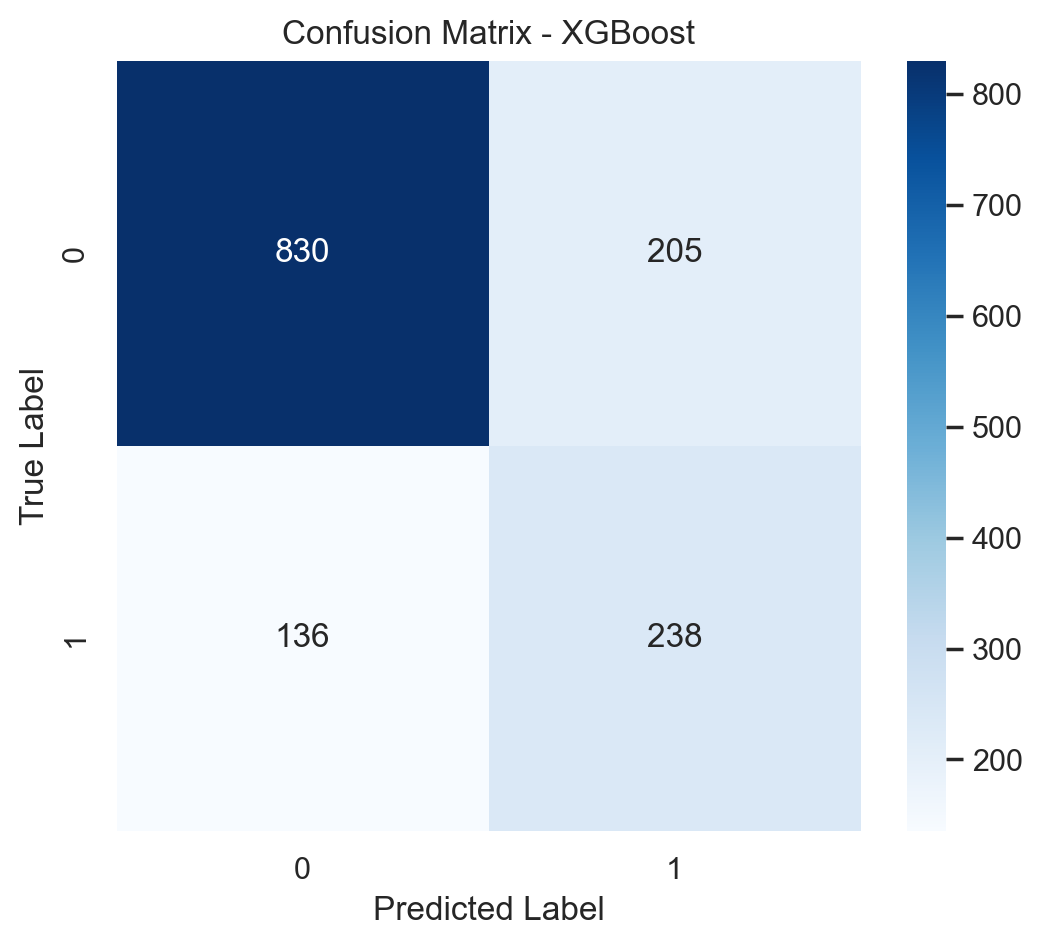

Classification Report - XGBoost:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1035
           1       0.54      0.64      0.58       374

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.77      0.76      0.76      1409



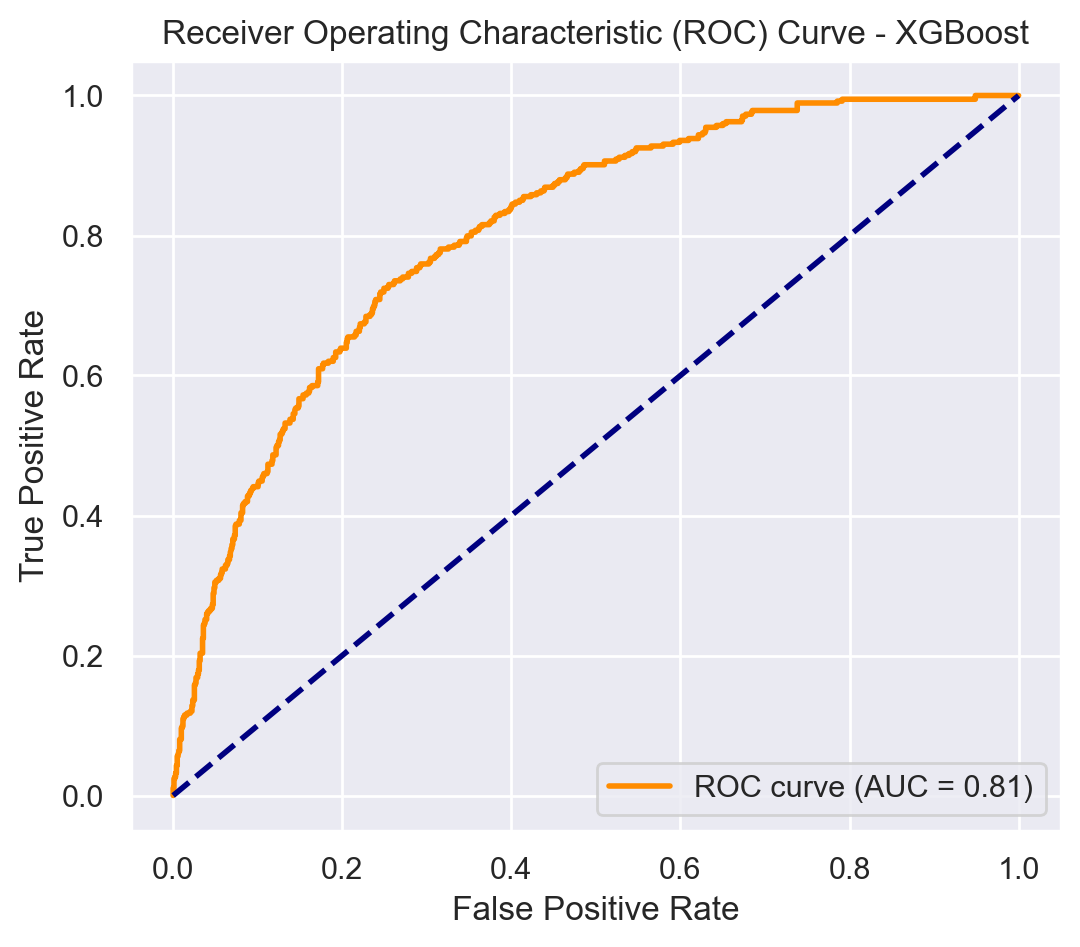

Best Parameters Found:
 {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300, 'subsample': 1.0}


In [58]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
)

# Perform GridSearchCV
grid_search = GridSearchCV(
    xgb_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2
)

# Fit on resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Retrieve the best model from tuning
xgb_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

# ROC Curve and AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print Classification Report
print("Classification Report - XGBoost:\n", class_report_xgb)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

# Print Best Parameters
print("Best Parameters Found:\n", grid_search.best_params_)

### Support vector model

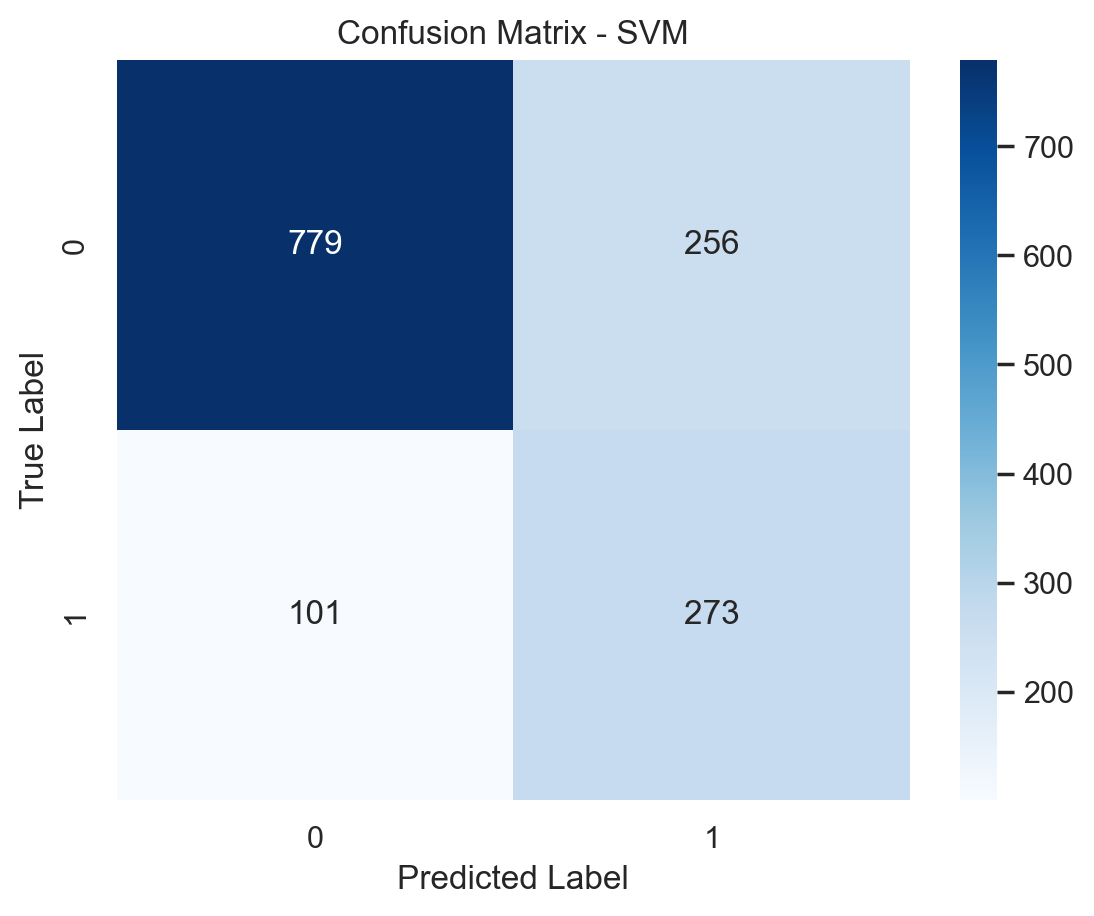

Classification Report - SVM:
               precision    recall  f1-score   support

           0       0.89      0.75      0.81      1035
           1       0.52      0.73      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



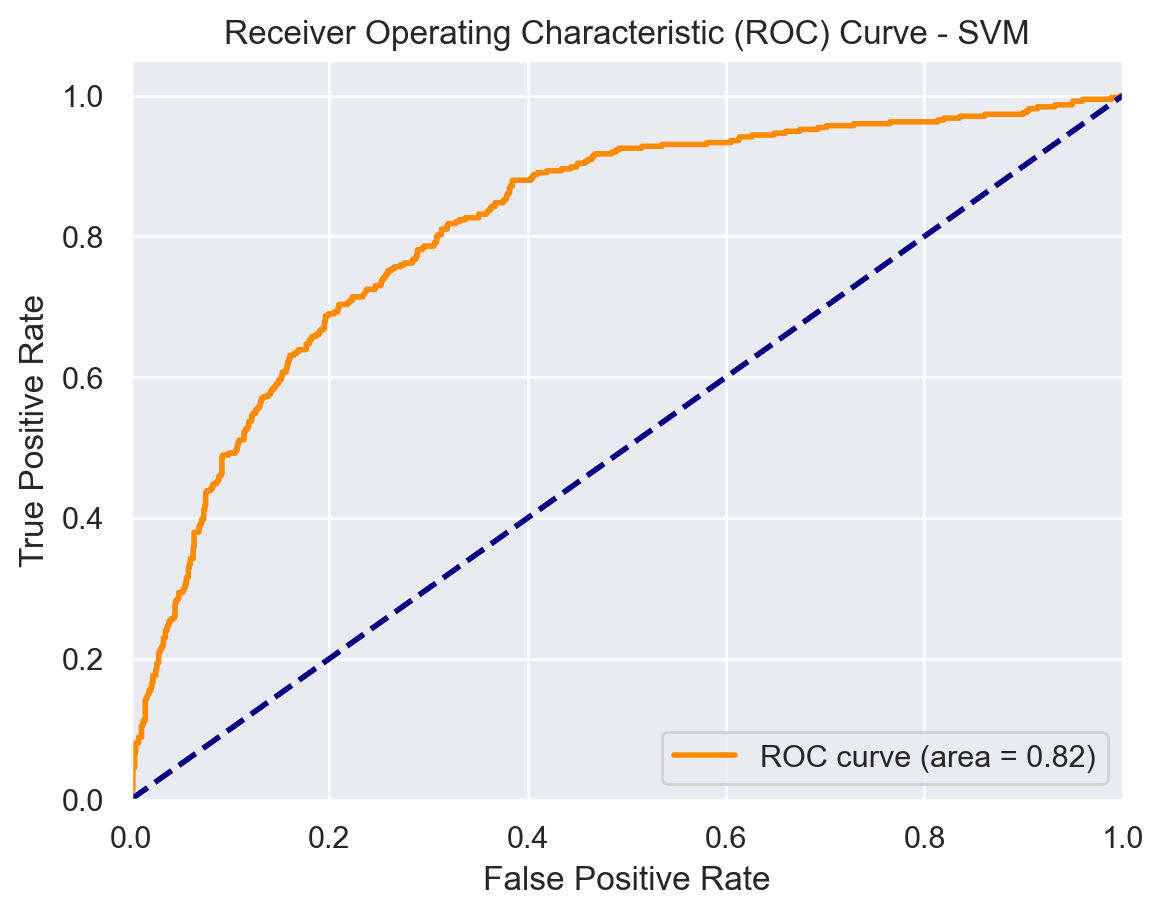

In [ ]:
# Initialize the SVM model
svm_model = SVC(probability=True, random_state=42, class_weight='balanced')

# Train the model on the resampled training data
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Classification Report
class_report_svm = classification_report(y_test, y_pred_svm)

# ROC Curve and AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotting the confusion matrix
plt.figure()
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Printing the Classification Report
print("Classification Report - SVM:\n", class_report_svm)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.show()

### Ada model

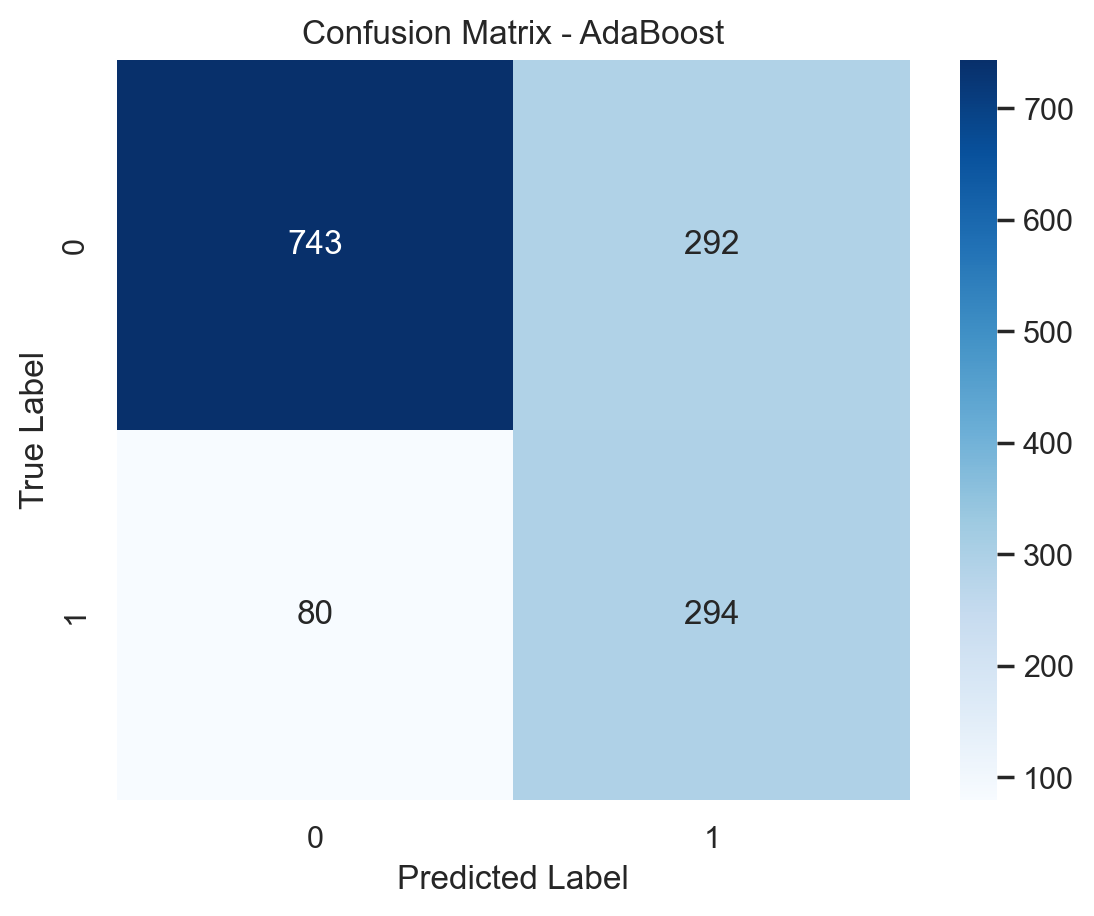

Classification Report - AdaBoost:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



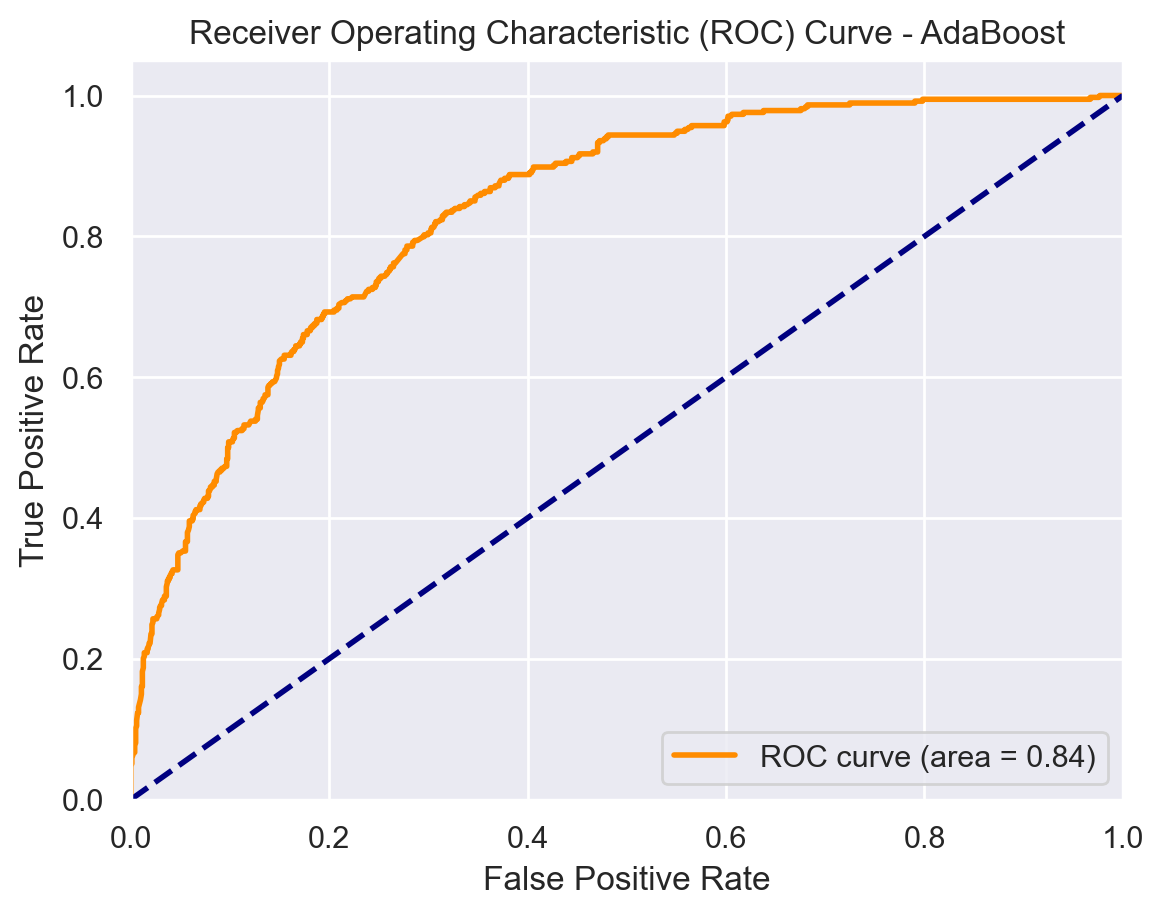

In [ ]:
# Initialize the AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model on the resampled training data
ada_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_ada = ada_model.predict(X_test)

# Evaluate the model
# Confusion Matrix
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)

# Classification Report
class_report_ada = classification_report(y_test, y_pred_ada)

# ROC Curve and AUC
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, ada_model.predict_proba(X_test)[:, 1])
roc_auc_ada = auc(fpr_ada, tpr_ada)

# Plotting the confusion matrix
plt.figure()
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Printing the Classification Report
print("Classification Report - AdaBoost:\n", class_report_ada)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr_ada, tpr_ada, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ada)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost')
plt.legend(loc="lower right")
plt.show()

### Gradient boosting model

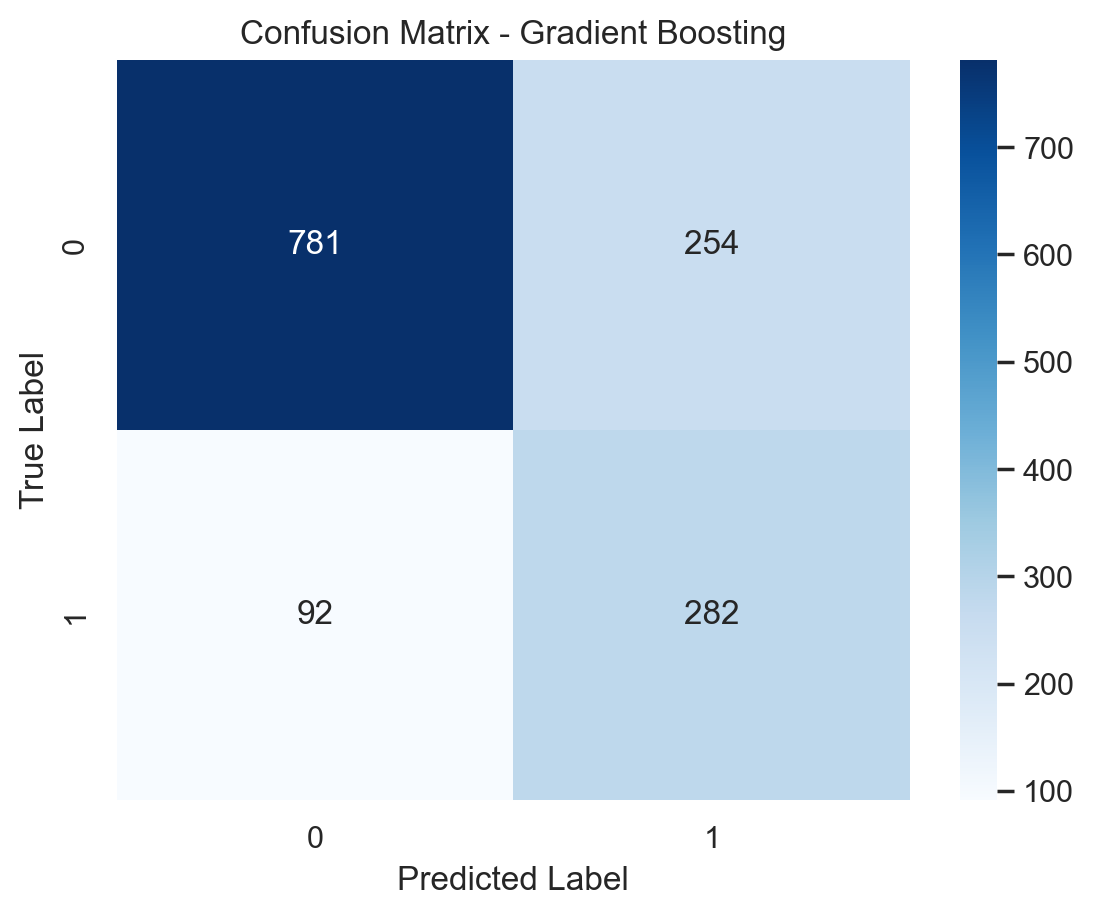

Classification Report - Gradient Boosting:
               precision    recall  f1-score   support

           0       0.89      0.75      0.82      1035
           1       0.53      0.75      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.75      0.77      1409



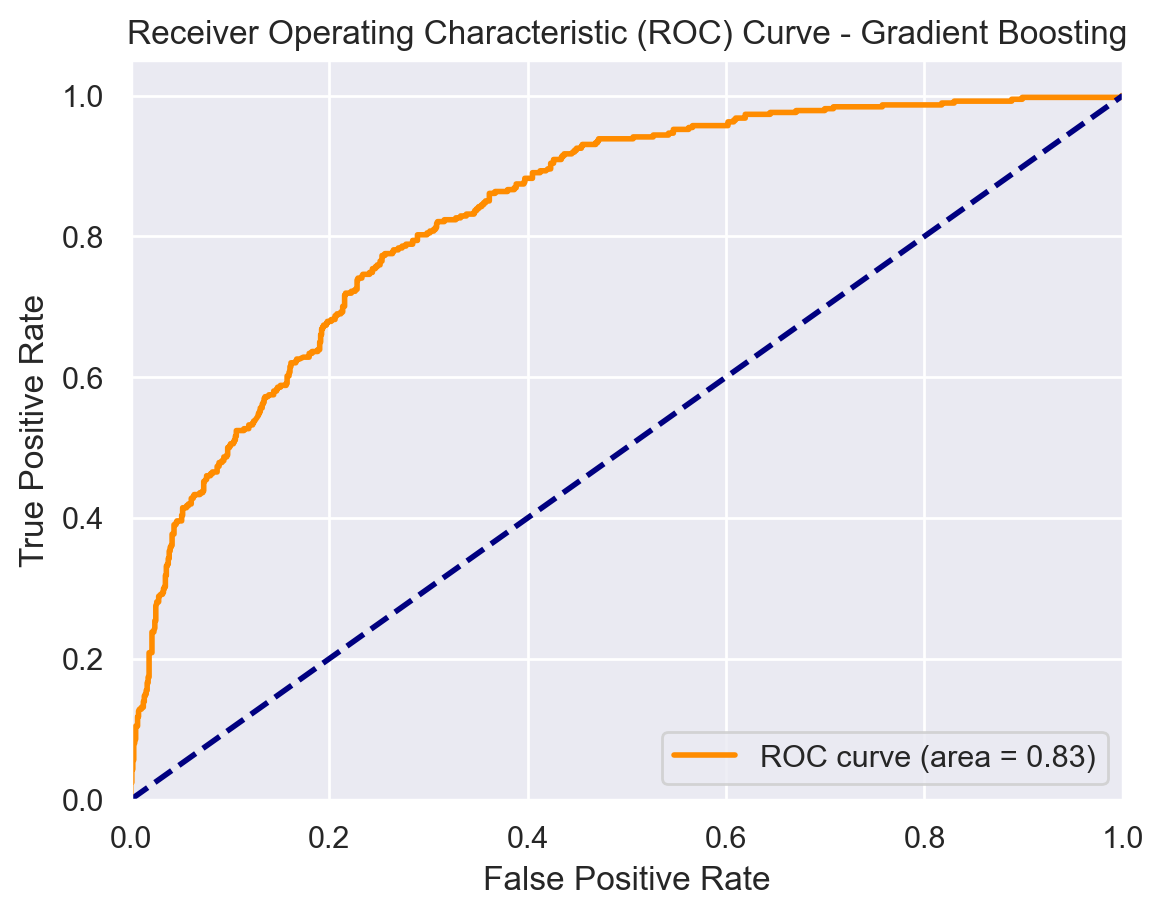

In [ ]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model on the resampled training data
gb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Classification Report
class_report_gb = classification_report(y_test, y_pred_gb)

# ROC Curve and AUC
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plotting the confusion matrix
plt.figure()
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Printing the Classification Report
print("Classification Report - Gradient Boosting:\n", class_report_gb)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

### LightGBM model

[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


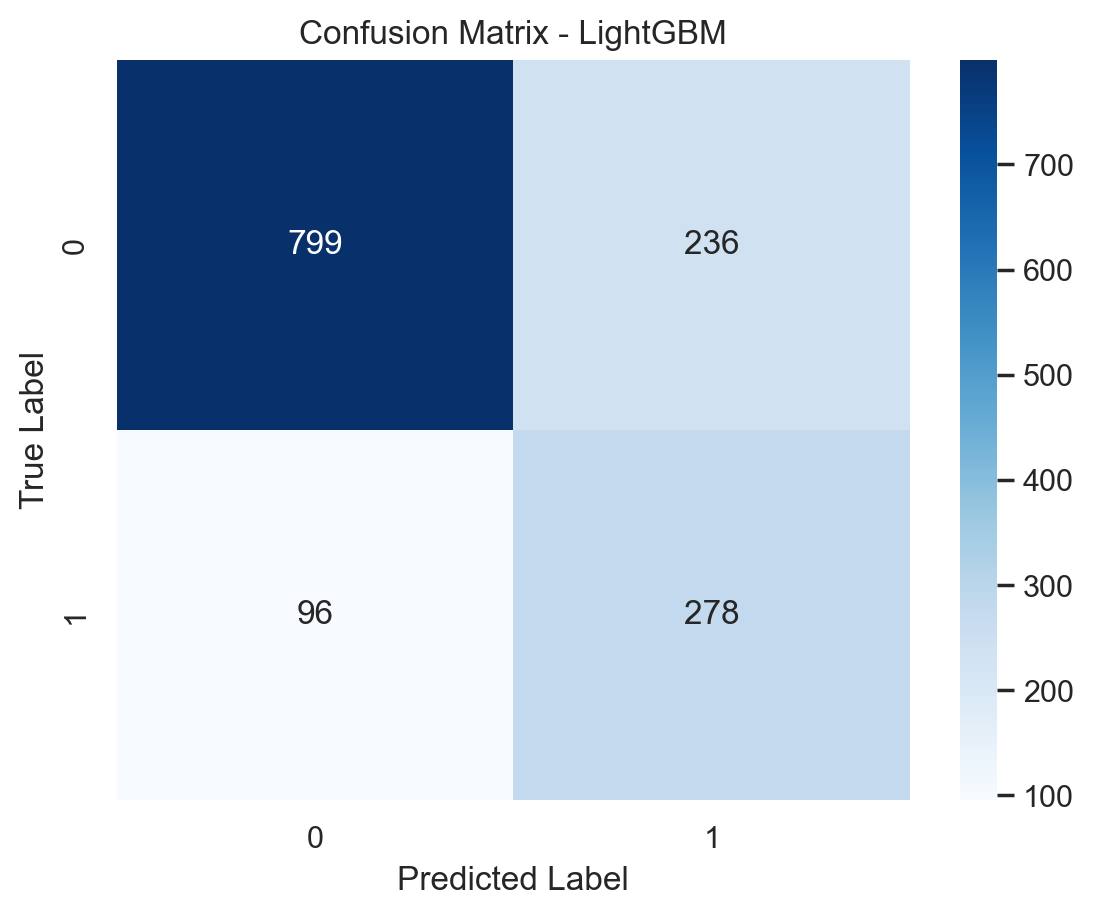

Classification Report - LightGBM:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83      1035
           1       0.54      0.74      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



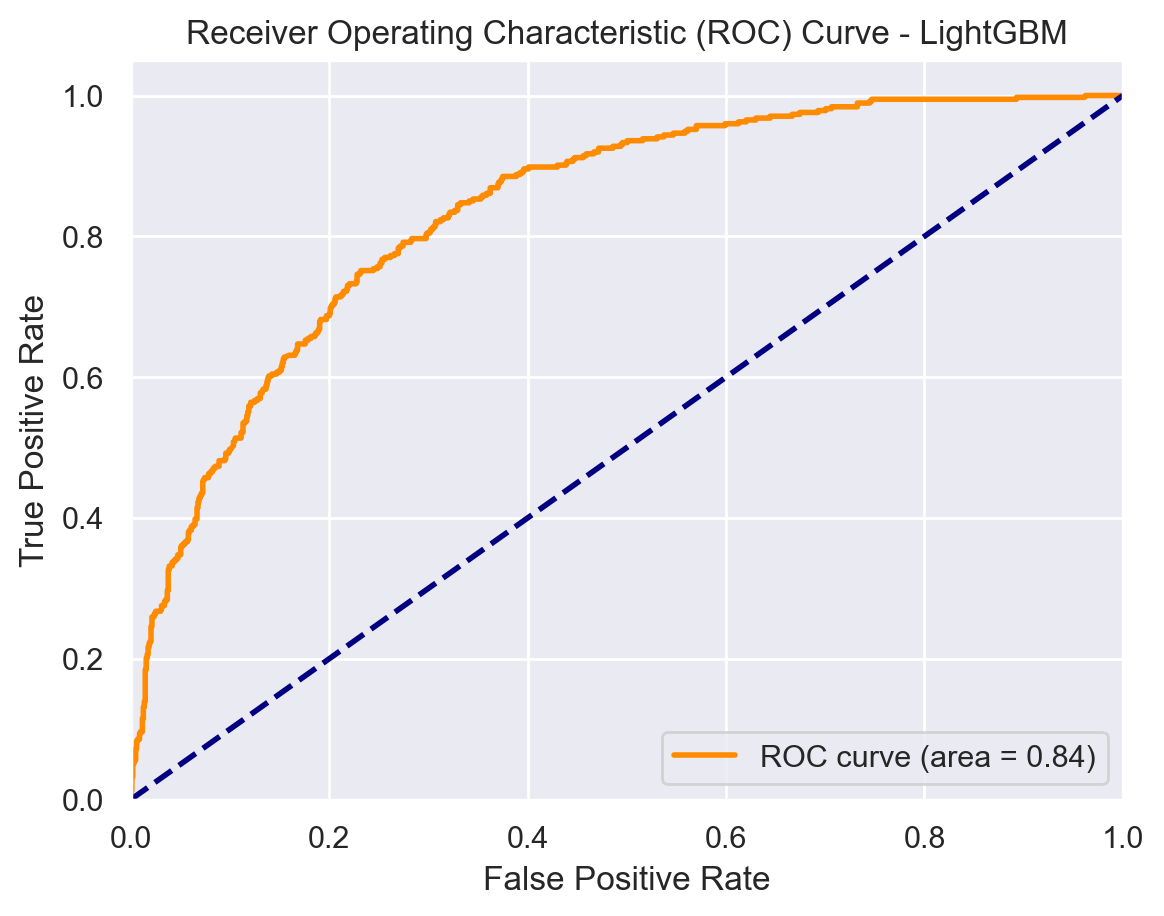

In [ ]:
# Initialize the LightGBM model
lgbm_model = lgb.LGBMClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',  # To handle class imbalance
    metric='binary_error',  # Binary classification problem
    learning_rate=0.05  # Controls the contribution of each tree
)

# Train the model on the resampled training data
lgbm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate the model
# Confusion Matrix
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Classification Report
class_report_lgbm = classification_report(y_test, y_pred_lgbm)

# ROC Curve and AUC
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, lgbm_model.predict_proba(X_test)[:, 1])
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

# Plotting the confusion matrix
plt.figure()
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - LightGBM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Printing the Classification Report
print("Classification Report - LightGBM:\n", class_report_lgbm)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr_lgbm, tpr_lgbm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lgbm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - LightGBM')
plt.legend(loc="lower right")
plt.show()

### Voting classifier

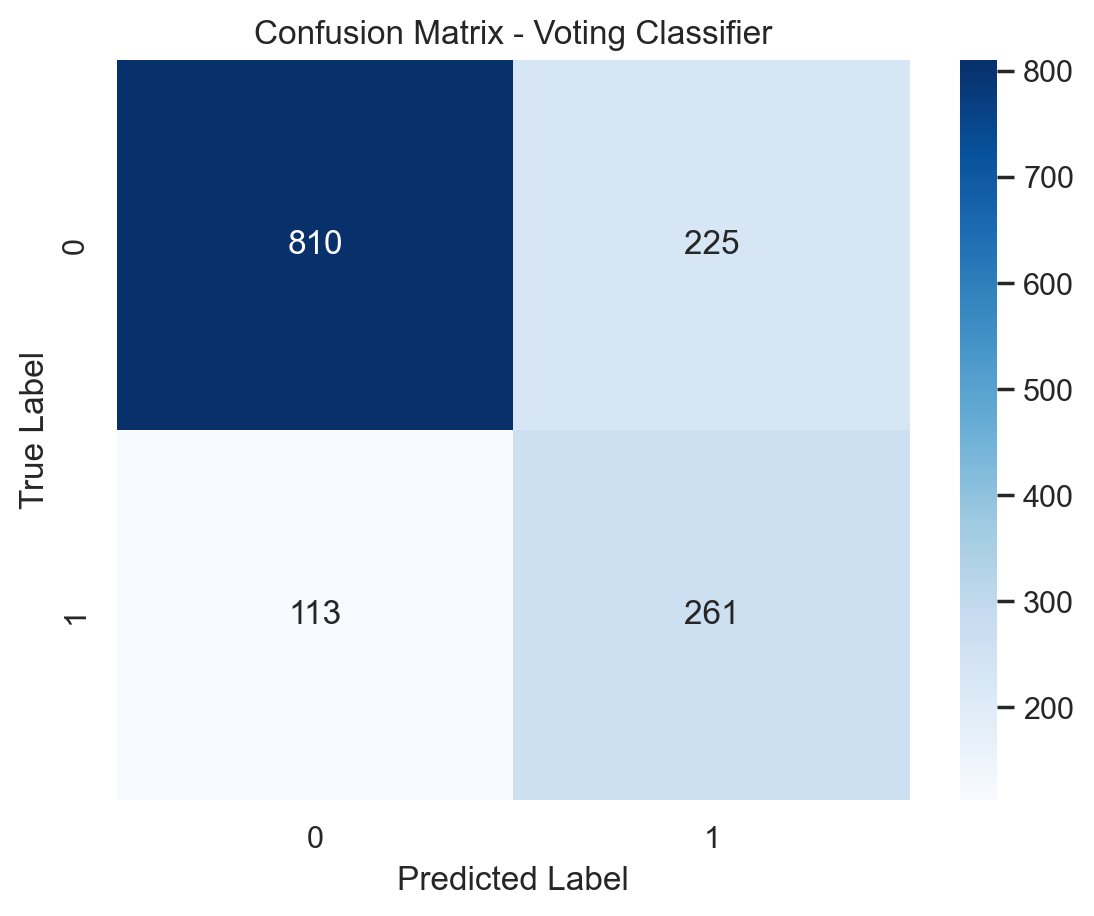

Classification Report - Voting Classifier:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.54      0.70      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



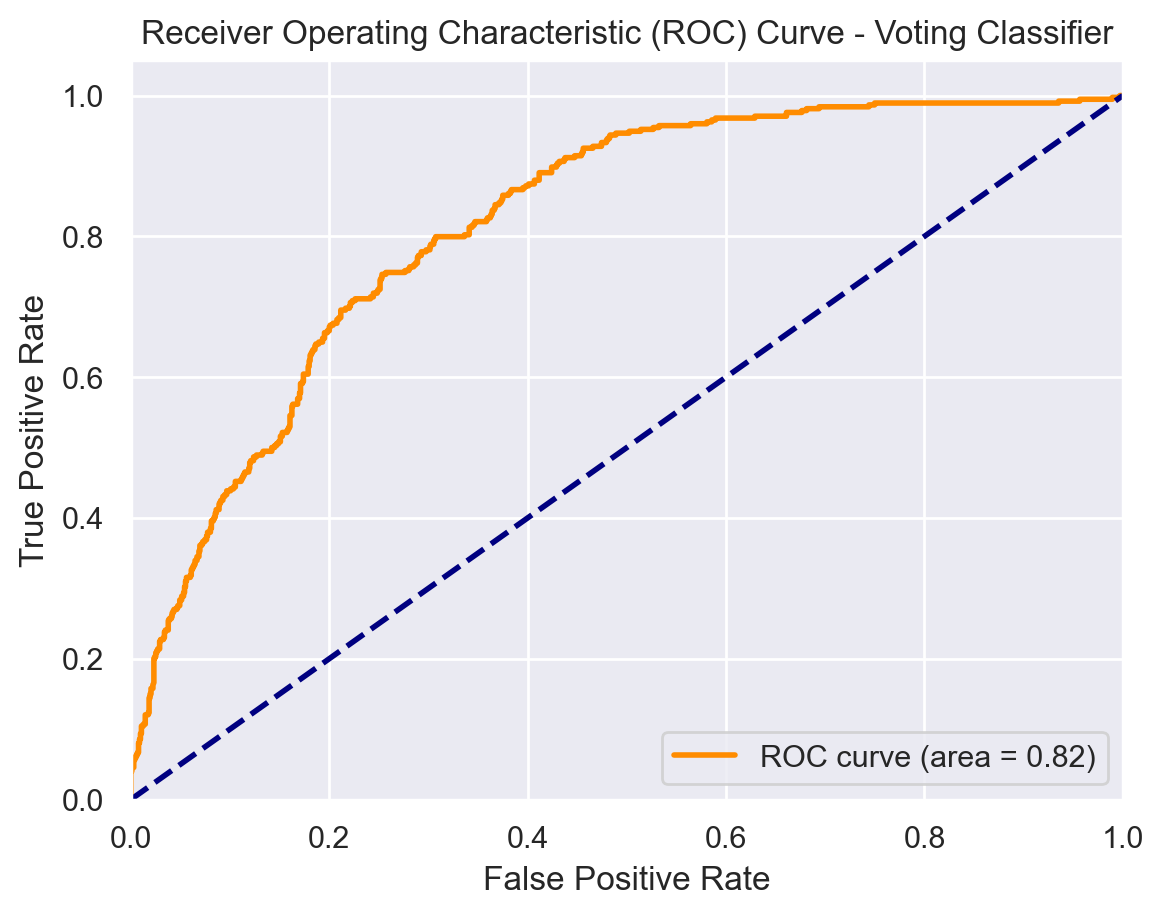

In [ ]:
# Initialize base models
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(probability=True)

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=[('logreg', logreg), ('dt', dt), ('svm', svm)], voting='soft')

# Train the Voting Classifier on the resampled training data
voting_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the model
# Confusion Matrix
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

# Classification Report
class_report_voting = classification_report(y_test, y_pred_voting)

# ROC Curve and AUC
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, voting_clf.predict_proba(X_test)[:, 1])
roc_auc_voting = auc(fpr_voting, tpr_voting)

# Plotting the confusion matrix
plt.figure()
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Voting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Printing the Classification Report
print("Classification Report - Voting Classifier:\n", class_report_voting)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr_voting, tpr_voting, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_voting)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Voting Classifier')
plt.legend(loc="lower right")
plt.show()

### Stacking classifier

[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3311, number of negative: 3311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 6622, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[L

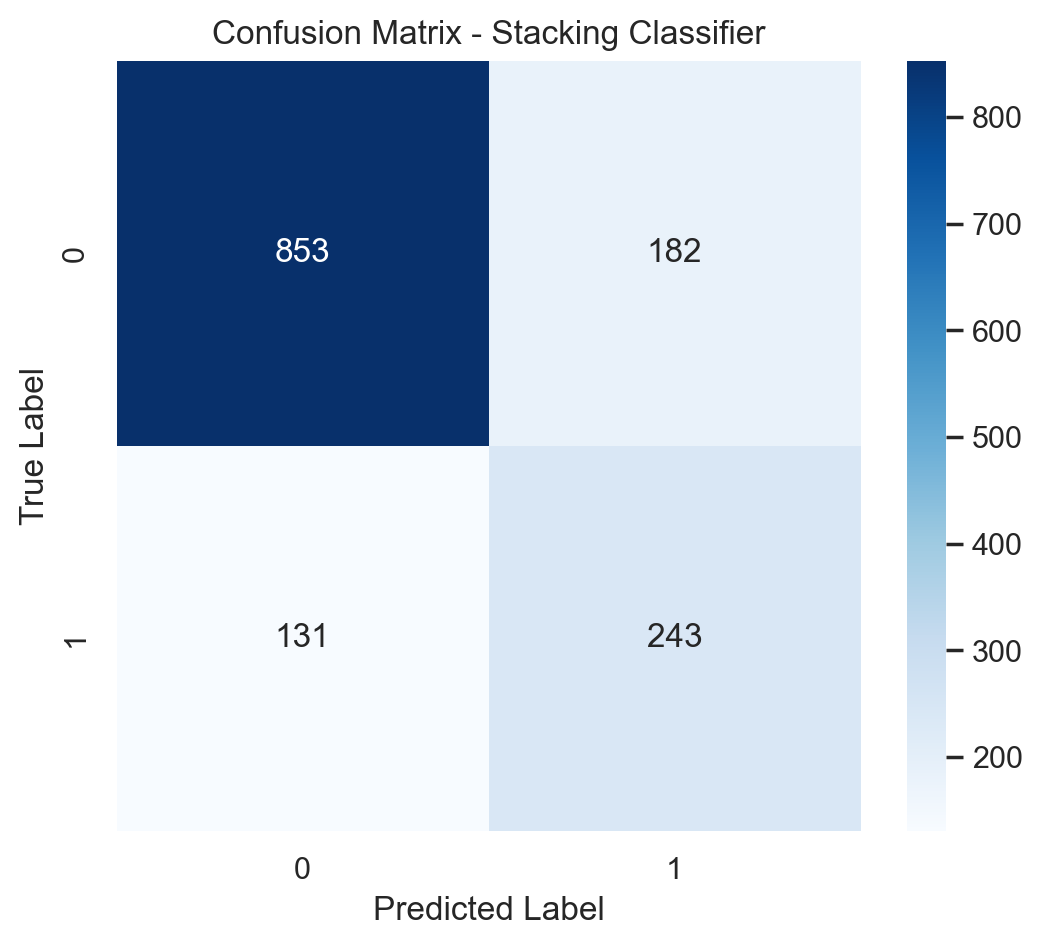

Classification Report - Stacking Classifier:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57      0.65      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



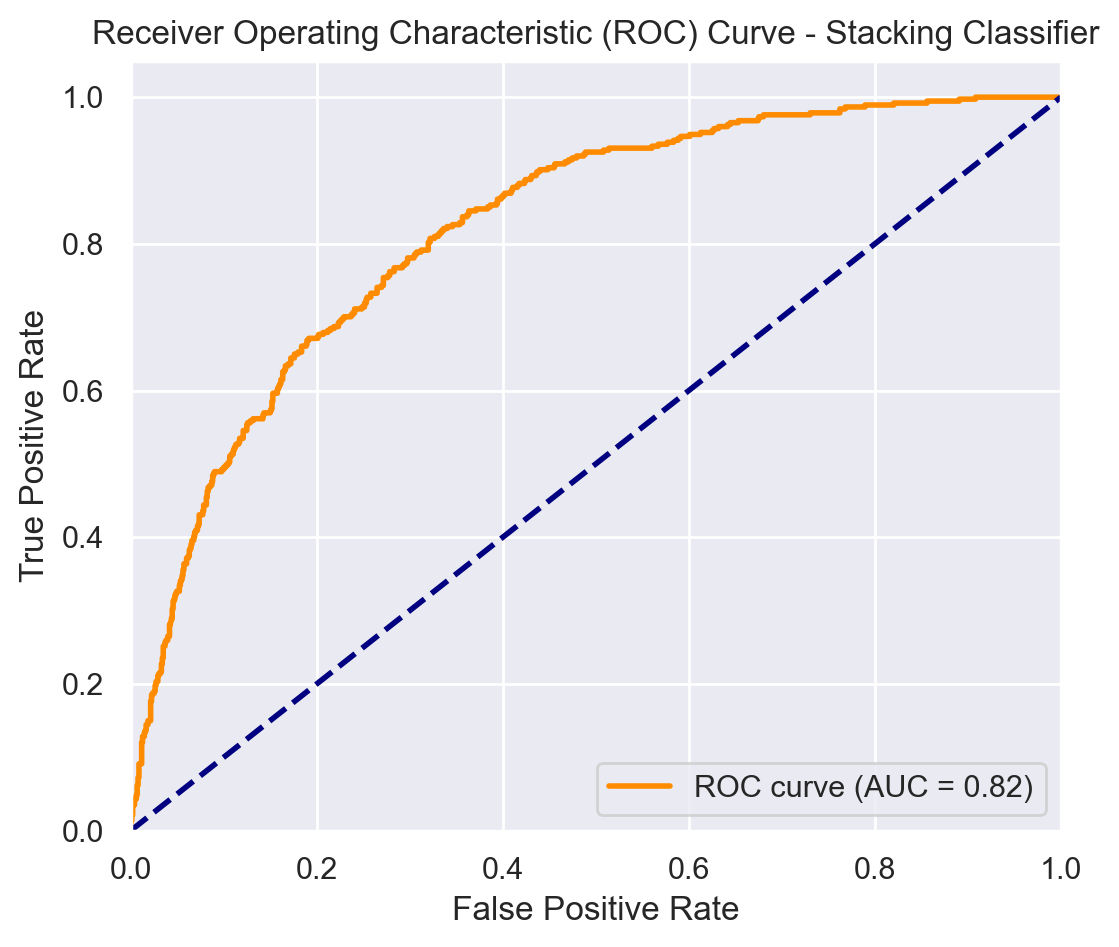

In [ ]:
# base models (Level 0)
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lgbm', lgb.LGBMClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))
]

# meta model (Level 1)
meta_model = LogisticRegression()

# Create Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_model, stack_method='auto')

# Train Stacking Classifier 
stacking_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_stacking = stacking_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_stacking)
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
class_report_stacking = classification_report(y_test, y_pred_stacking)

# ROC Curve and AUC
fpr_stacking, tpr_stacking, _ = roc_curve(y_test, stacking_clf.predict_proba(X_test)[:, 1])
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_stacking, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Stacking Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Printing the Classification Report
print("Classification Report - Stacking Classifier:\n", class_report_stacking)

# Plotting the ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_stacking, tpr_stacking, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_stacking)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Stacking Classifier')
plt.legend(loc="lower right")
plt.show()

### ANN Model

Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.6996 - loss: 0.5580
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.7717 - loss: 0.4773
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.7802 - loss: 0.4491
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.7929 - loss: 0.4408
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.7914 - loss: 0.4454
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.7969 - loss: 0.4338
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.8046 - loss: 0.4329
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.7940 - loss: 0.4366
Epoch 9/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.8035 - loss: 0.4266
Epoch 10/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.8135 - loss: 0.4116
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step


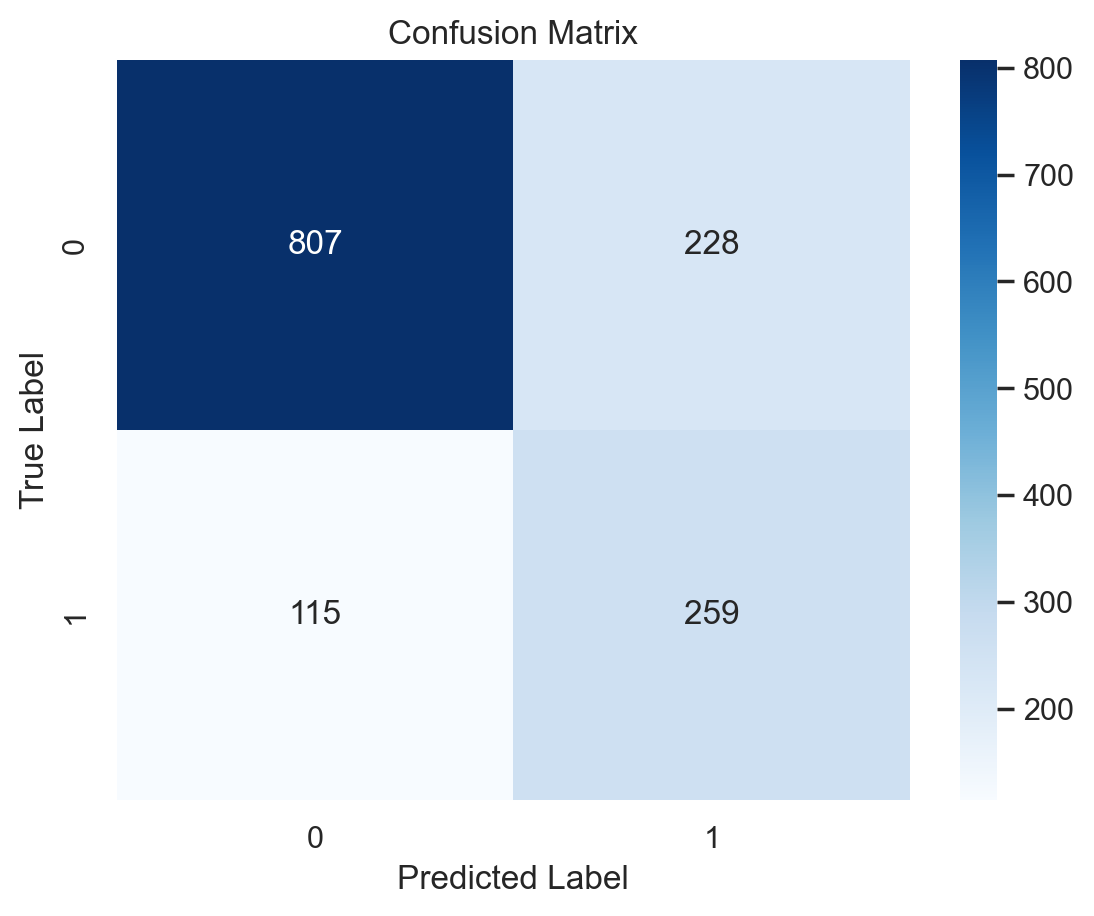

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82      1035
           1       0.53      0.69      0.60       374

    accuracy                           0.76      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.78      0.76      0.77      1409



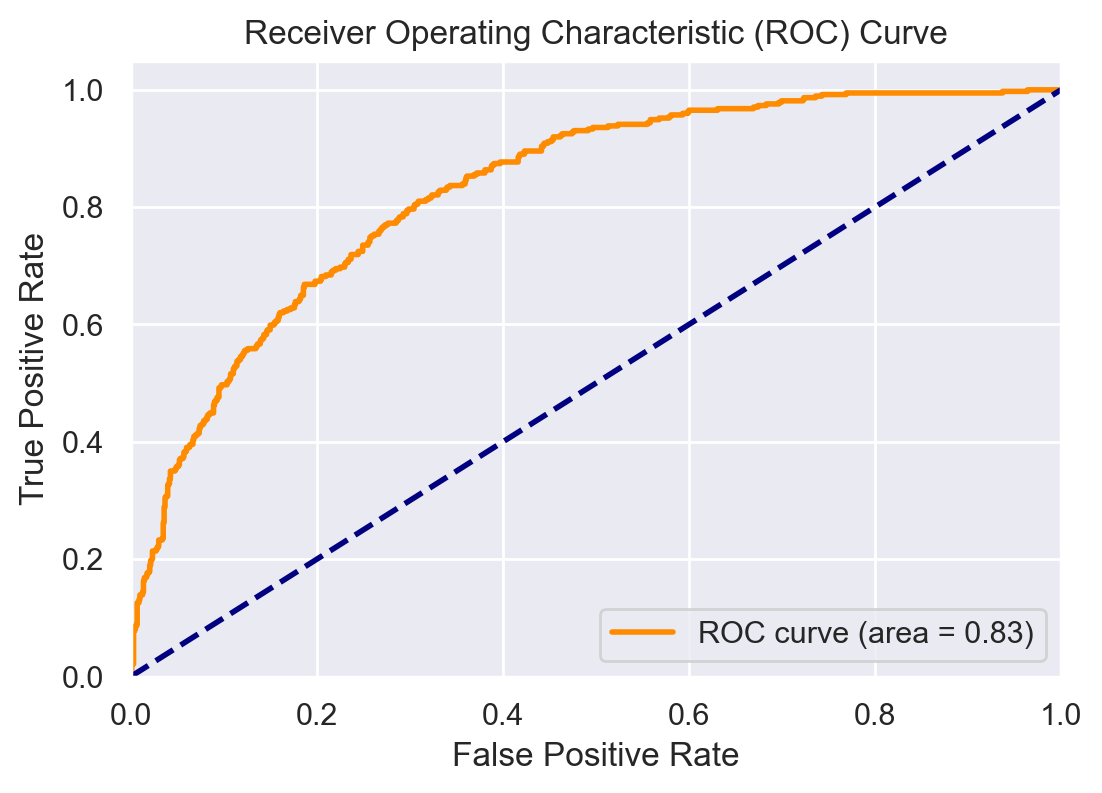

In [ ]:
# Initialize the ANN model
ann_model = Sequential([
    # Input layer and first hidden layer
    Dense(units=64, activation='relu', input_dim=X_train_resampled.shape[1]), 
    # Second hidden layer
    Dense(units=32, activation='relu'),
    # Output layer
    Dense(units=1, activation='sigmoid')  # For binary classification
])

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
ann_model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32)

# Make predictions on the test data
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
# Confusion Matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)

# Classification Report
class_report_ann = classification_report(y_test, y_pred_ann)

# ROC Curve and AUC
fpr_ann, tpr_ann, thresholds = roc_curve(y_test, ann_model.predict(X_test))
roc_auc_ann = auc(fpr_ann, tpr_ann)

# Plotting the confusion matrix
plt.figure()
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Printing the Classification Report
print("Classification Report:\n", class_report_ann)

# Plotting the ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_ann, tpr_ann, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ann)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Overall model results**

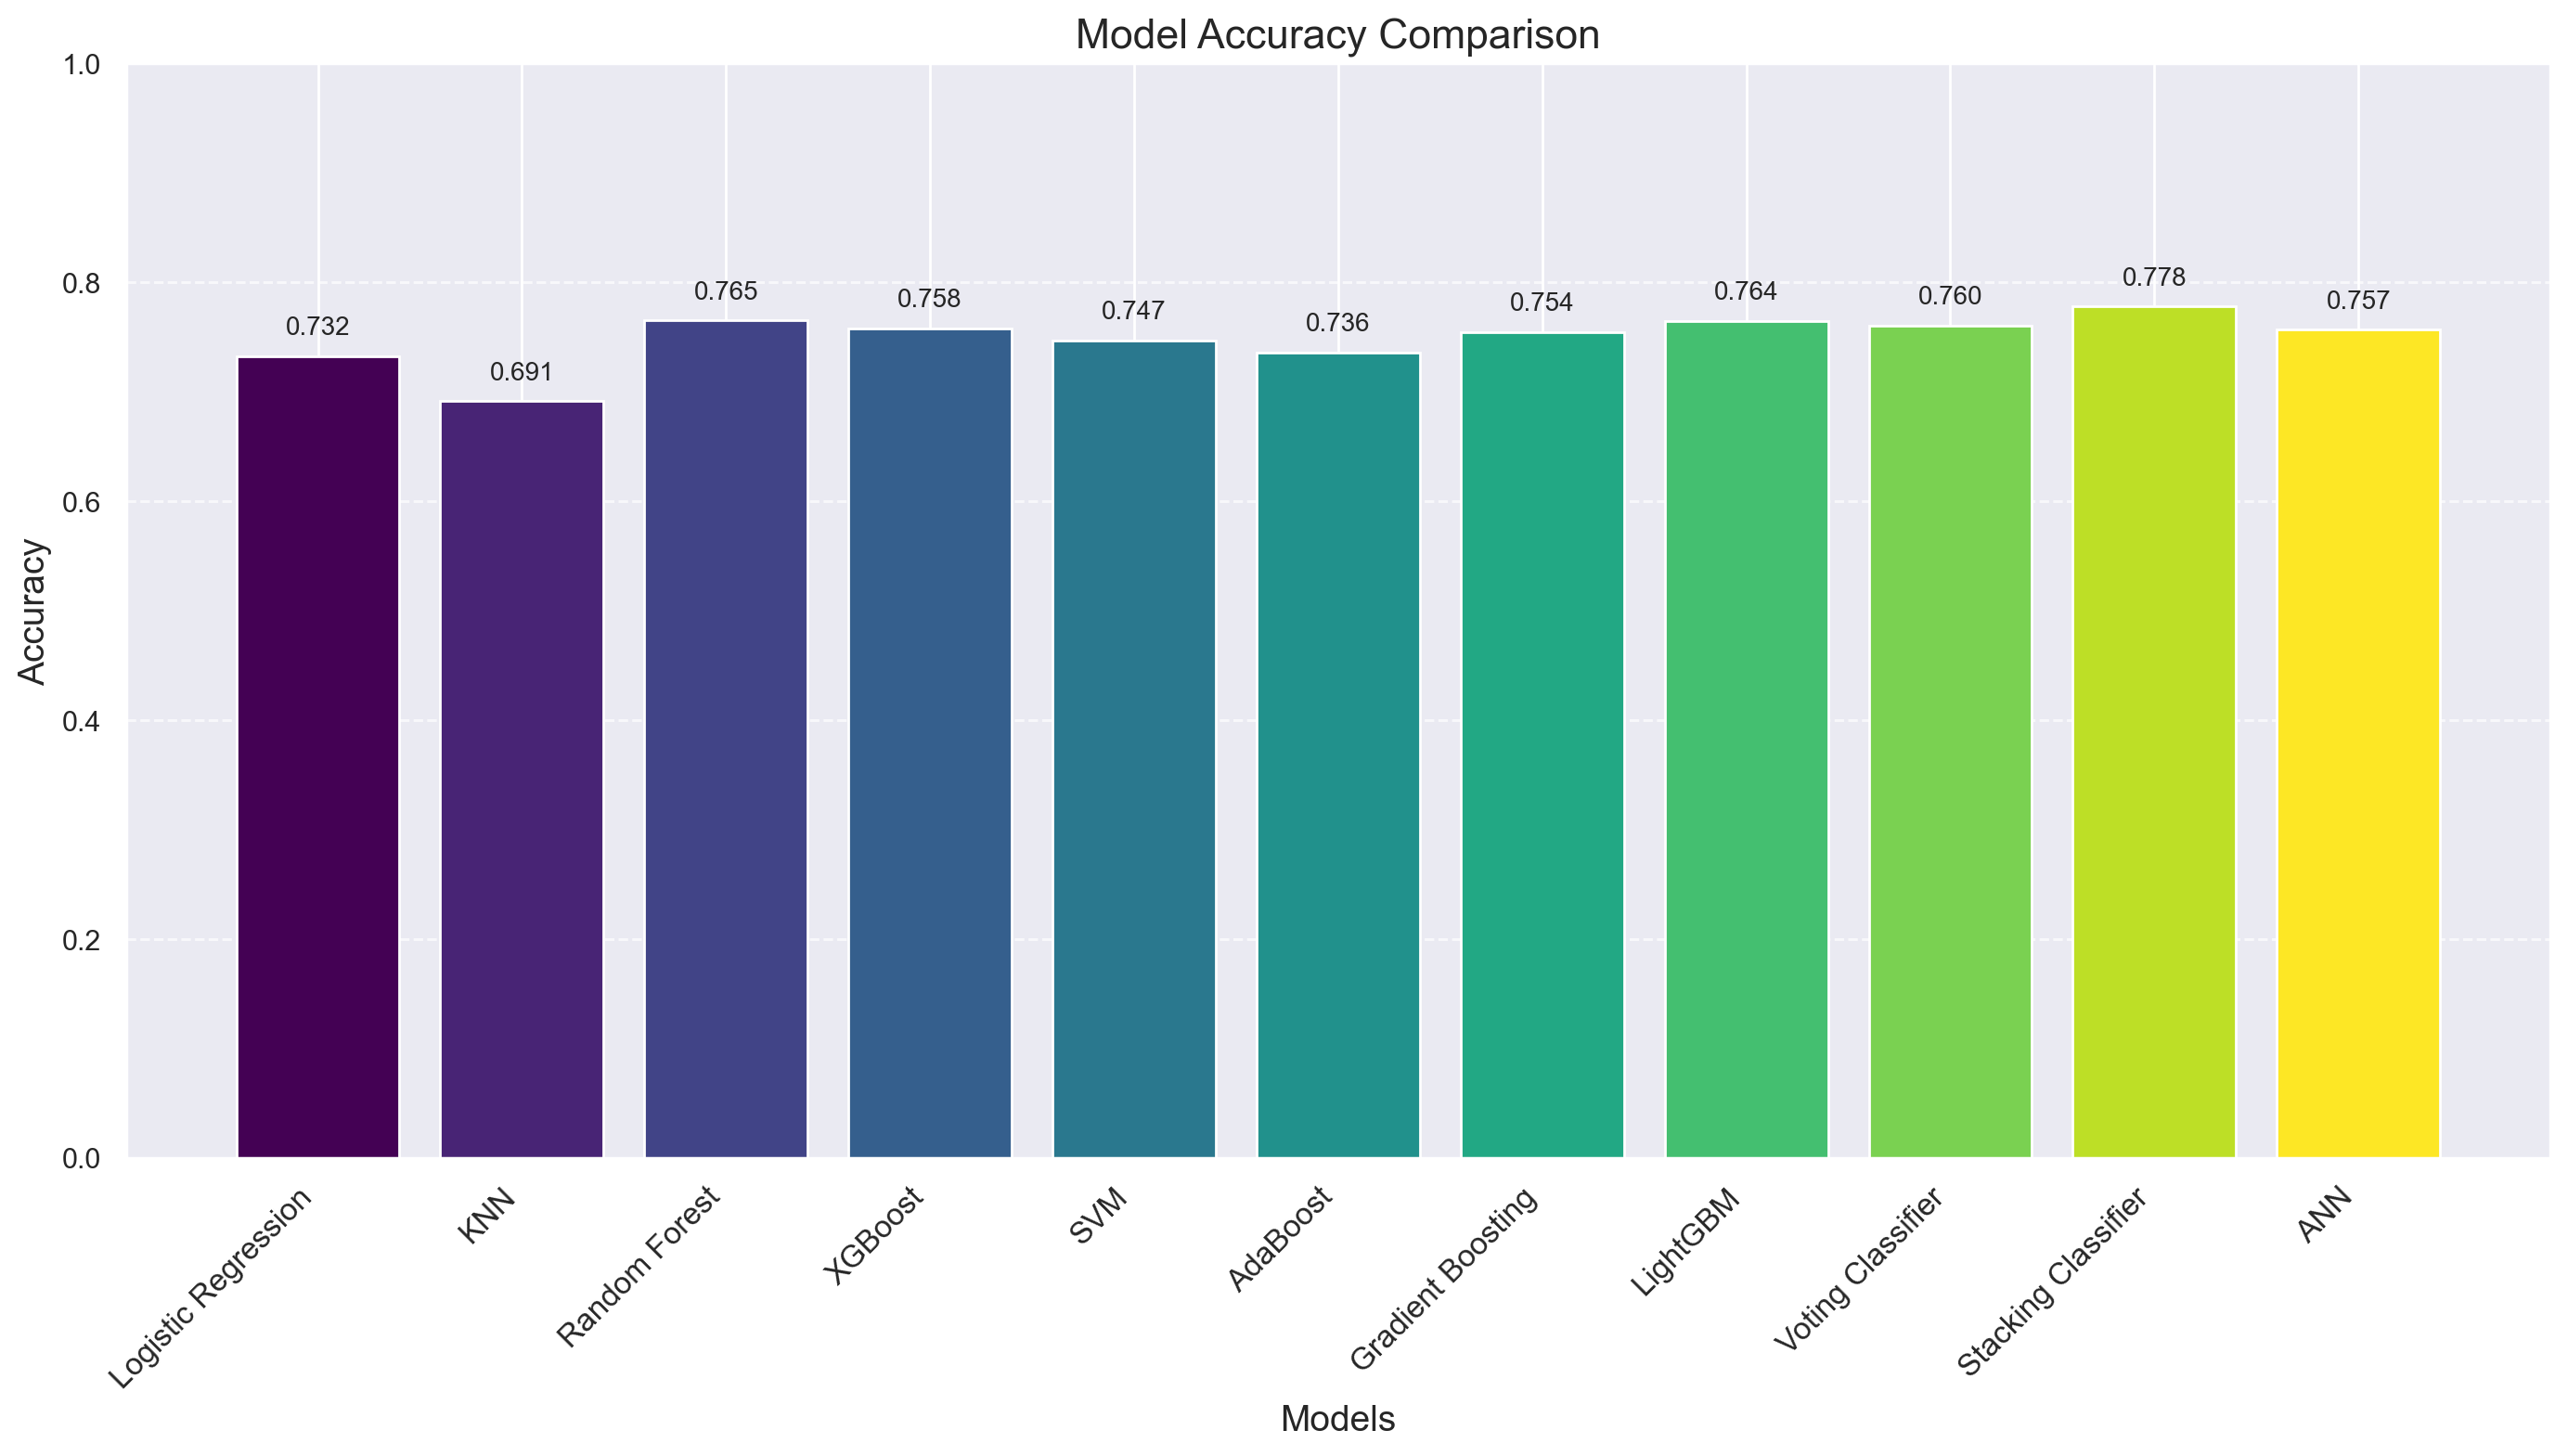

In [ ]:
# all the models
model_names = [
    'Logistic Regression', 
    'KNN', 
    'Random Forest', 
    'XGBoost', 
    'SVM', 
    'AdaBoost', 
    'Gradient Boosting', 
    'LightGBM', 
    'Voting Classifier', 
    'Stacking Classifier',
    'ANN'
]

# Calculate accuracies for all models
accuracies = [
    accuracy_score(y_test, y_pred_lr),                        # Logistic Regression
    accuracy_score(y_test, y_pred_knn),                       # KNN
    accuracy_score(y_test, y_pred_rf),                        # Random Forest
    accuracy_score(y_test, y_pred_xgb),                       # XGBoost
    accuracy_score(y_test, y_pred_svm),                       # SVM
    accuracy_score(y_test, y_pred_ada),                       # AdaBoost
    accuracy_score(y_test, y_pred_gb),                        # Gradient Boosting
    accuracy_score(y_test, y_pred_lgbm),                      # LightGBM
    accuracy_score(y_test, y_pred_voting),                    # Voting Classifier
    accuracy_score(y_test, y_pred_stacking),                  # Stacking Classifier
    accuracy_score(y_test, y_pred_ann)                        # ANN
]

# Define colors for better visualization
colors = plt.cm.viridis(np.linspace(0, 1, len(model_names)))

# Create a bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, accuracies, color=colors)

# Adding titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.3f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

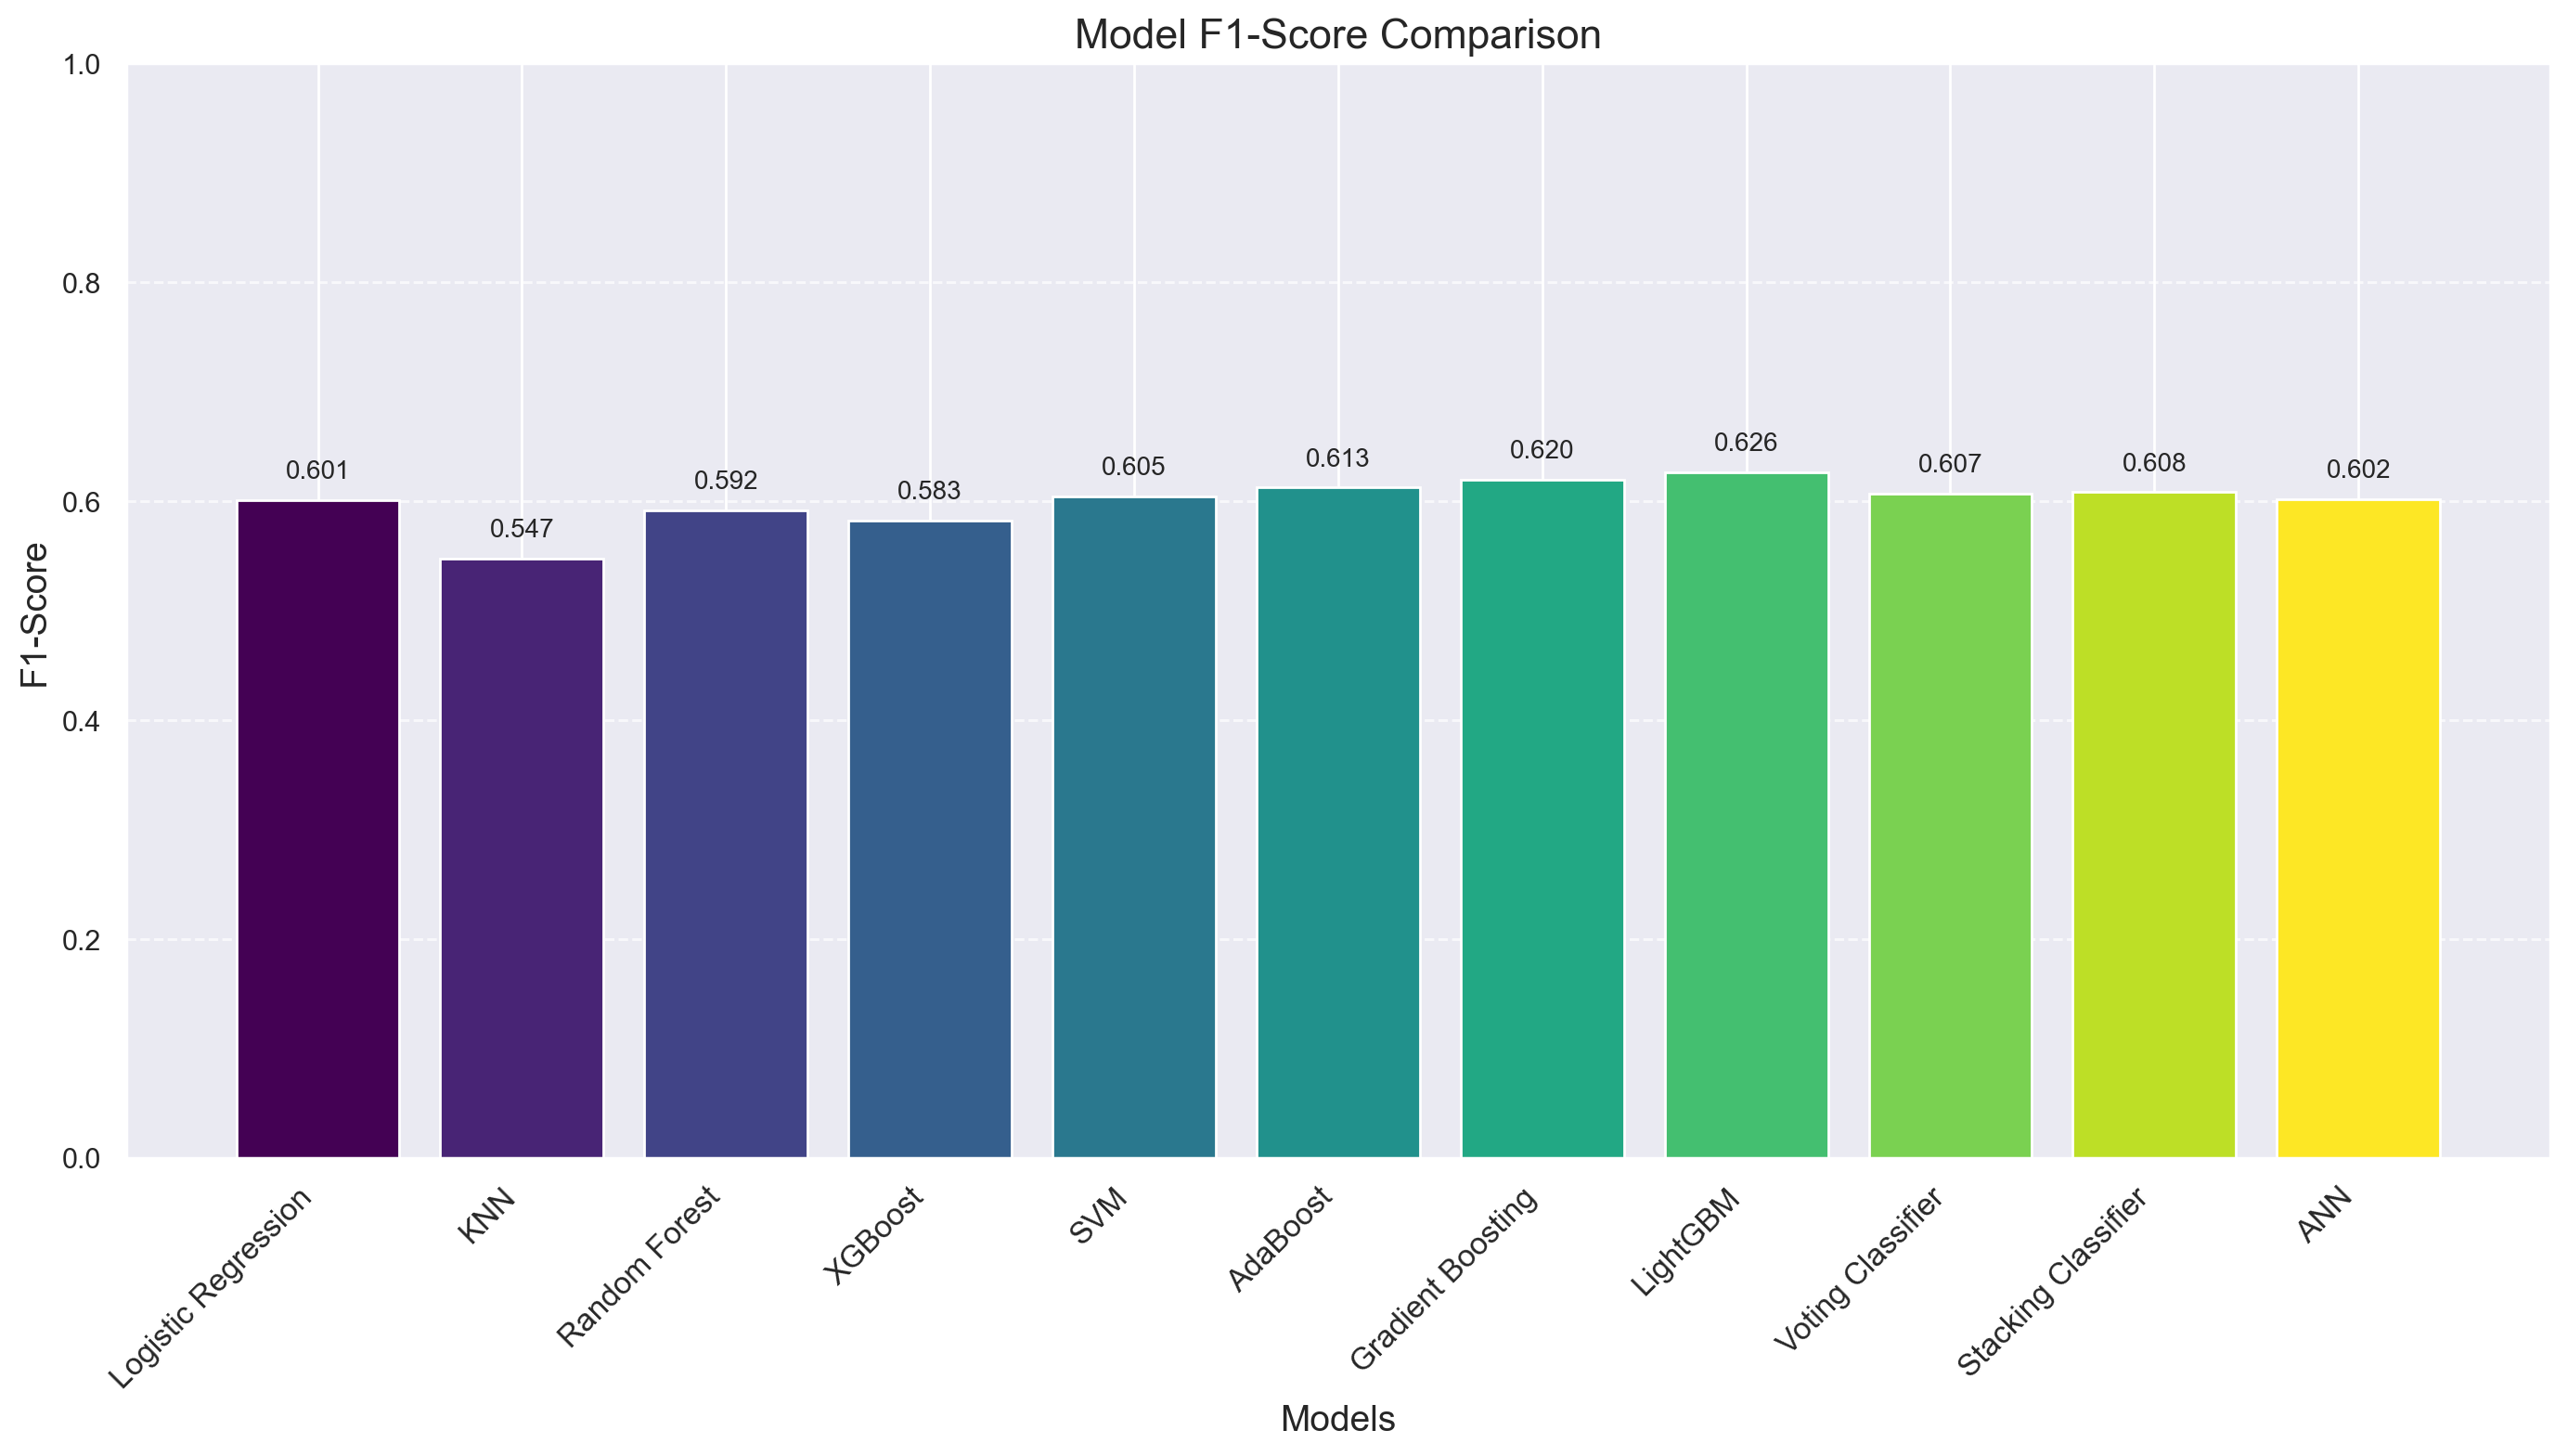

In [ ]:
# all the models
model_names = [
    'Logistic Regression', 
    'KNN', 
    'Random Forest', 
    'XGBoost', 
    'SVM', 
    'AdaBoost', 
    'Gradient Boosting', 
    'LightGBM', 
    'Voting Classifier', 
    'Stacking Classifier',
    'ANN'
]

# Calculate F1-scores for all models
f1_scores = [
    f1_score(y_test, y_pred_lr),                        # Logistic Regression
    f1_score(y_test, y_pred_knn),                       # KNN
    f1_score(y_test, y_pred_rf),                        # Random Forest
    f1_score(y_test, y_pred_xgb),                       # XGBoost
    f1_score(y_test, y_pred_svm),                       # SVM
    f1_score(y_test, y_pred_ada),                       # AdaBoost
    f1_score(y_test, y_pred_gb),                        # Gradient Boosting
    f1_score(y_test, y_pred_lgbm),                      # LightGBM
    f1_score(y_test, y_pred_voting),                    # Voting Classifier
    f1_score(y_test, y_pred_stacking),                  # Stacking Classifier
    f1_score(y_test, y_pred_ann)                        # ANN
]

# Define colors for better visualization
colors = plt.cm.viridis(np.linspace(0, 1, len(model_names)))

# Create a bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, f1_scores, color=colors)

# Adding titles and labels
plt.title('Model F1-Score Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('F1-Score', fontsize=14)
plt.ylim(0, 1) 
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add F1-score values on top of the bars
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1 + 0.02, f'{f1:.3f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# **Save model**

In [407]:
model_filename = "xgboost_churn_model.pkl"

# Save the model
with open(model_filename, 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)

print(f"Model saved as {model_filename}")


Model saved as xgboost_churn_model.pkl


In [68]:
stacking_model_filename = "stacking_classifier_model.pkl"

# Save the stacking classifier model
with open(stacking_model_filename, 'wb') as file:
    pickle.dump(stacking_clf, file)

print(f"Stacking Classifier Model saved as {stacking_model_filename}")

Stacking Classifier Model saved as stacking_classifier_model.pkl


In [69]:
# Load the model
with open("stacking_classifier_model.pkl", 'rb') as file:
    loaded_model = pickle.load(file)

# Test with sample input
sample_data = [[0,	0,	1,	1,	10,	1,	0,	0,	0,	0,	2,	2,	0,	0,	0,	0,	1,	55.2,	528.35]]
prediction = loaded_model.predict(sample_data)

print(f"Churn Prediction: {prediction[0]}")


Churn Prediction: 0
